In [487]:
import os
import sys

sys.path.append("/home/pkarpov/Sapsan")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sapsan.utils import line_plot, plot_params
from scipy.signal import savgol_filter as savgol

style = 'tableau-colorblind10'
mpl.style.use(style)
mpl.rcParams.update(plot_params()) 
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']                       

def plot_shock_evolution(base_path, dataset, masses, savepath, filt_y=False):
    
    fig = plt.figure(figsize=(10,6), dpi=80)
    ax  = fig.add_subplot(111)
    
    if '/ml/' in base_path and 'g9k' in dataset:
        l, b, h, w = .53, .18, .3, .4
        ax2 = fig.add_axes([l, b, w, h])
        ax2.get_xaxis().set_visible(False)

    datasets = [f's{m}{dataset}' for m in masses]

    if 'adam' in base_path: 
        ax.set_xlim(0,300)
        ax.set_ylim(100,500)
        yfac    = 1
        xshift  = 0
    else: 
        ax.set_xlim(0,250)
        # ax.set_ylim(7e1,2.2e2)
        ax.set_ylim(8e1,1.8e2)
        # ax.set_ylim(8e1,2.5e2)
        yfac   = 1e-5
        xshift = 0
        
    if 'g2k' in dataset:
        ax.set_xlim(0,400)
        ax.set_ylim(8e1,3.5e2)
        yfac   = 1e-5
        xshift = 0 

    # # --- add the 12 Msol 2k dashed ---
    # file1d = f'{base_path}s12.0_g2k_c1.4k_p0.3k/plots/evolution.txt'
    # vals   = np.genfromtxt(file1d, skip_header=1)
    # vals   = np.moveaxis(vals,0,1)
    
    # for j,var in enumerate(vals[0]):
    #     if var!=0: break    
    
    # x = (vals[0][j:]-vals[0][j:][0])*1e3+xshift
    # y = vals[5][j:]*yfac
    
    # if filt_y: y=savgol(y, 50, 2)
    
    # ax.plot(x,y,
    #         linewidth=2,linestyle='--',color=colors[0],
    #         label = '12.0 lr')
    # # -----------------------------------

    for i, dataset in enumerate(datasets): 
        file1d = f'{base_path}{dataset}/plots/evolution.txt'
        vals   = np.genfromtxt(file1d, skip_header=1)
        vals   = np.moveaxis(vals,0,1)
        
        for j,var in enumerate(vals[0]):
            if var!=0: break    
        
        x = (vals[0][j:]-vals[0][j:][0])*1e3+xshift
        y = vals[5][j:]*yfac
        
        if filt_y: y=savgol(y, 50, 2)
        
        # ax.semilogy(
        ax.plot(x,y,
                linewidth=2, #marker='o', markersize=2,
                # label = f'grid={grids[i]}k')
                # label = f'{masses[i]} {grid}')
                label = f'{round(masses[i])}')

        if '/ml/' in base_path and 'g9k' in dataset:
            ax2.plot(x,y, lw=1)
            ax2.yaxis.set_ticks([100,300,500])
            ax2.set_xlim(0,250)
            ax2.set_ylim(8e1,500)

    if 'adam' in base_path: ax.legend(loc=2, ncols=2, fontsize=16)
    else: ax.legend(loc=2, ncols=2)
    ax.set_xlabel(r'$t-t_{bounce}$ [ms]')
    ax.set_ylabel('Shock Position [km]')
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))    
    if 'g9k' in dataset: ax.xaxis.set_ticks(np.arange(50,300,50))
    else: ax.xaxis.set_ticks(np.arange(0,450,50))

    # ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
    fig.tight_layout()

    if savepath!=None: 
        print(f'{base_path}{savepath}')
        plt.savefig(f'{base_path}{savepath}')
    
    return ax

/home/pkarpov/scratch/1dccsn/sfho_s/production/stan_fix/baseline/shock_evolution_g2k_paper.png
/home/pkarpov/scratch/1dccsn/sfho_s/production/stan_fix/ml/shock_evolution_g2k_paper.png


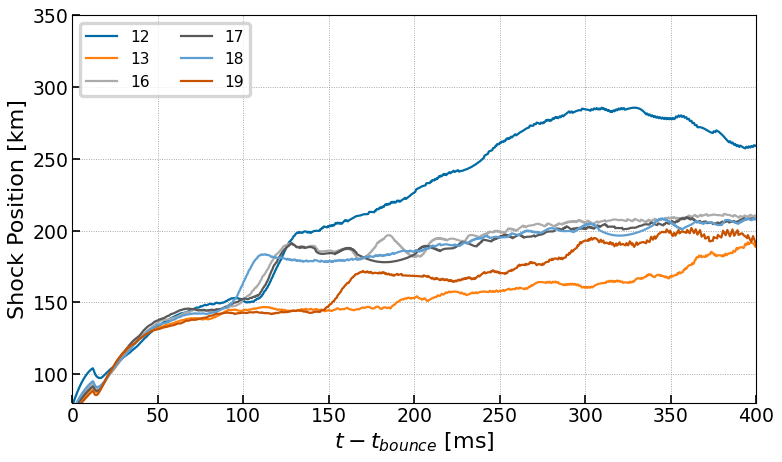

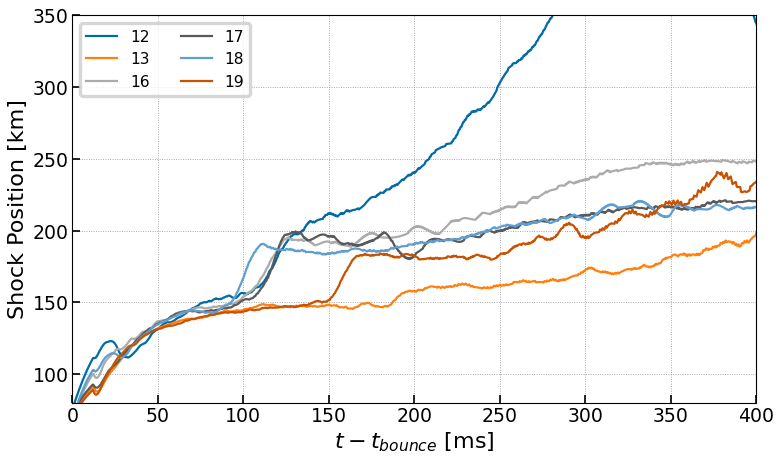

In [488]:
# COLLAPSO1D 2k and 9k shock evolution plots
base_path = [
             '/home/pkarpov/scratch/1dccsn/sfho_s/production/stan_fix/baseline/',
             '/home/pkarpov/scratch/1dccsn/sfho_s/production/stan_fix/ml/'
            ]
masses    = [12.0,13.0,16.0,17.0,18.0,19.0]
# dataset   = '_g8k_c7k_p0.6k'
dataset   = '_g9k_c8.4k_p0.3k'
dataset   = '_g2k_c1.4k_p0.3k'
savepath  = 'shock_evolution_g2k_paper.png'

for i in range(len(base_path)):
    ax = plot_shock_evolution(base_path[i], dataset, masses, savepath, filt_y=True)


/home/pkarpov/scratch/adam/shock_evolution_adam.png


<AxesSubplot: xlabel='$t-t_{bounce}$ [ms]', ylabel='Shock Position [km]'>

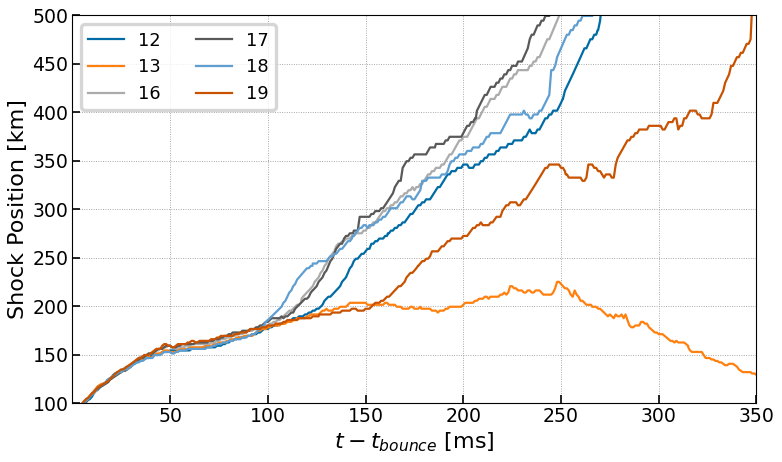

In [434]:
# 1D training from Adam shock evolution

base_path = '/home/pkarpov/scratch/adam/'
masses    = [12.0,13.0,16.0,17.0,18.0,19.0]
dataset   = '.swbj15.horo.3d'
savepath  = 'shock_evolution_adam.png'

plot_shock_evolution(base_path, dataset, masses, savepath)

/home/pkarpov/scratch/1dccsn/sfho_s/production/stan_fix/ml/


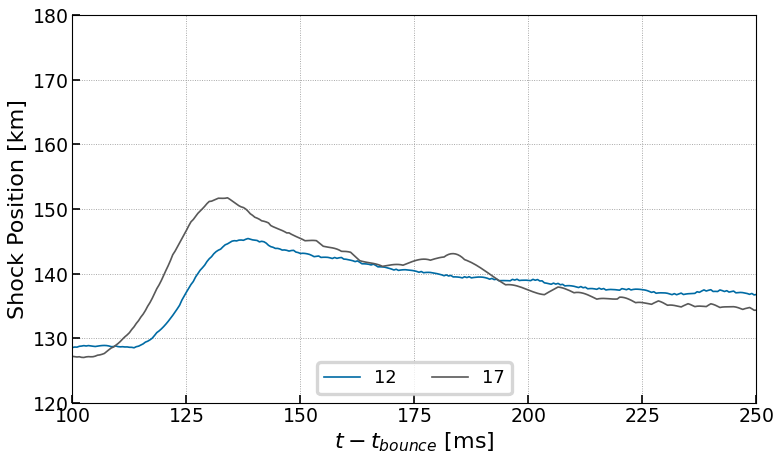

In [2]:
# Comparison plot of base to ML

import os
import sys

sys.path.append("/home/pkarpov/Sapsan")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sapsan.utils import line_plot, plot_params
from scipy.signal import savgol_filter as savgol

def get_data(base_path, dataset):
    file1d = f'{base_path}{dataset}/plots/evolution.txt'
    vals = np.genfromtxt(file1d, skip_header=1)
    vals = np.moveaxis(vals,0,1)
    
    for j,var in enumerate(vals[0]):
        if var!=0: break    
    
    x = (vals[0][j:]-vals[0][j:][0])*1e3
    y = vals[5][j:]*1e-5
    
    if "baseline" in base_path: x += 2
    
    return x,savgol(y, 50, 2)

style = 'tableau-colorblind10'
mpl.style.use(style)
mpl.rcParams.update(plot_params()) 

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']                       

base_path_1        = '/home/pkarpov/scratch/1dccsn/sfho_s/production/stan_fix/baseline/'
base_path_2        = '/home/pkarpov/scratch/1dccsn/sfho_s/production/stan_fix/ml/'

fig = plt.figure(figsize=(10,6), dpi=80)
ax  = fig.add_subplot(111)

# masses = [12.0,13.0,16.0,17.0,18.0,19.0]
masses = [12.0,17.0]

datasets = [f's{m}_g9k_c8.4k_p0.3k' for m in masses]
# datasets = [f's{m}_g2k_c1.4k_p0.3k' for m in masses]

grids    = [1.5, 2, 4, 6, 9] 
grid     = datasets[0].split('_')[1]

# if grid == 2: datasets = [f's{m}_g2k_c1.4k_p0.3k' for m in masses]

for i, dataset in enumerate(datasets): 
    x1, y1 = get_data(base_path_1, dataset)
    x2, y2 = get_data(base_path_2, dataset)
    
    if masses[i]==17.0: icolor = 3
    else: icolor=i
    ax.plot(x1, y1, color=colors[icolor],  lw=1.5, label = f'{round(masses[i])}')
    # ax.plot(x2, y2, '--', color=colors[icolor], lw=1.5, label = '%d with $P_{turb}$'%(round(masses[i])))

ax.legend(loc=8, ncols=2, fontsize=16)
ax.set_xlim(100,250)
if '2k' in grid: ax.set_ylim(7e1,2.3e2)
else: ax.set_ylim(120,1.8e2)
ax.xaxis.set_ticks(np.arange(100,275,25))

ax.set_xlabel(r'$t-t_{bounce}$ [ms]')
ax.set_ylabel('Shock Position [km]')
# ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
# ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
fig.tight_layout()

print(base_path_2)
plt.savefig(f'{base_path_2}base_comparison_{grid}_baseline.png')

/home/pkarpov/scratch/1dccsn/sfho_s/production/stan_fix/ml/


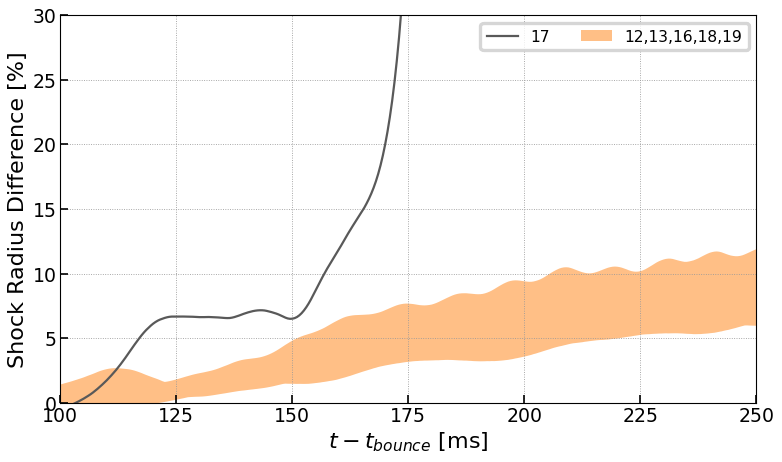

In [264]:
# Min max shock radius increase percentages

import os
import sys

sys.path.append("/home/pkarpov/Sapsan")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sapsan.utils import line_plot, plot_params
from scipy.signal import savgol_filter as savgol

def get_data(base_path, dataset):
    file1d = f'{base_path}{dataset}/plots/evolution.txt'
    vals = np.genfromtxt(file1d, skip_header=1)
    vals = np.moveaxis(vals,0,1)
    
    for j,var in enumerate(vals[0]):
        if var!=0: break    
    
    x = (vals[0][j:]-vals[0][j:][0])*1e3
    y = vals[5][j:]*1e-5
    
    if "baseline" in base_path: x += 2
    
    return x,savgol(y, 50, 2)

style = 'tableau-colorblind10'
mpl.style.use(style)
mpl.rcParams.update(plot_params()) 

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']                       

base_path_1        = '/home/pkarpov/scratch/1dccsn/sfho_s/production/stan_fix/baseline/'
base_path_2        = '/home/pkarpov/scratch/1dccsn/sfho_s/production/stan_fix/ml/'

fig = plt.figure(figsize=(10,6), dpi=80)
ax  = fig.add_subplot(111)

# masses = [12.0,13.0,16.0,17.0,18.0,19.0]
masses = [13.0,16.0,18.0,19.0,12.0]

datasets = [f's{m}_g9k_c8.4k_p0.3k' for m in masses]
# datasets = [f's{m}_g2k_c1.4k_p0.3k' for m in masses]
m,res = datasets[0].split('_')[:2]

filt_y = True

grids    = [1.5, 2, 4, 6, 9] 
grid     = datasets[0].split('_')[1]

minmax = np.zeros((len(masses),1000))

for i, dataset in enumerate(datasets): 
    x1, y1 = get_data(base_path_1, dataset)
    x2, y2 = get_data(base_path_2, dataset)
    
    if filt_y: 
        y1=savgol(y1, 50, 2)
        y2=savgol(y2, 50, 2)
    
    if masses[i]==17.0: icolor = 3
    else: icolor=i
    
    try: y = (y2/y1[:len(y2)]-1)*100
    except: y = (y2[:len(y1)]/y1-1)*100
    
    minmax[i][:len(y)] = y
    
    # if masses[i]==12: ax.plot(x2, y, '-', color=colors[icolor], lw=1)#, label = '%d with $P_{turb}$'%(round(masses[i])))
    if masses[i]==19: minmax[i][len(y):len(y)+50]=max(y)
    
spreadmin = [minmax[-1,i]-min(minmax[:,i]) for i in range(len(minmax[-1]))]
spreadmax = [max(minmax[:,i])-minmax[-1,i] for i in range(len(minmax[-1]))]

# Shade the 17 Msol exploded sim
dataset = 's17.0_g9k_c8.4k_p0.3k'
x1, y1 = get_data(base_path_1, dataset)
xexp, y2 = get_data(base_path_2, dataset)
icolor = 3

if filt_y: 
    y1=savgol(y1, 50, 2)
    y2=savgol(y2, 50, 2)

minmax_exp = np.zeros((1,1000))
yexp = (y2/y1[:len(y2)]-1)*100
minmax_exp[0][:len(yexp)] = yexp

spreadmin_exp = [minmax_exp[0,i]-min(minmax[:,i]) for i in range(len(minmax[-1]))]
spreadmax_exp = [max(minmax[:,i])-minmax_exp[0,i] for i in range(len(minmax[-1]))]

plt.plot(xexp, yexp, color=colors[icolor],linewidth=2,label='17')

# plt.fill_between(xexp, yexp-np.abs(spreadmin_exp[:len(yexp)]), yexp, alpha=0.3, label='17')

plt.fill_between(x2, y-np.abs(spreadmin[:len(y)]), y+np.abs(spreadmax[:len(y)]), facecolor=[colors[1]],alpha=0.5, label='12,13,16,18,19')

ax.legend(loc=0, ncols=2)
ax.set_xlim(100,250)
ax.set_ylim(0,30)
ax.xaxis.set_ticks(np.arange(100,275,25))

ax.set_xlabel(r'$t-t_{bounce}$ [ms]')
ax.set_ylabel('Shock Radius Difference [%]')
# ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
# ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
fig.tight_layout()

print(base_path_2)
# plt.savefig(f'{base_path_2}shock_increase_{res}_paper.png')

/home/pkarpov/scratch/1dccsn/sfho_s/production/stan_fix/ml/


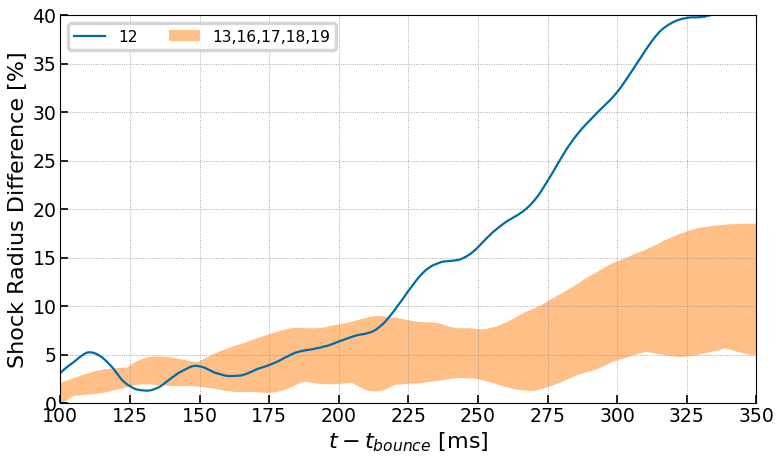

In [8]:
# Min max shock radius increase percentages

import os
import sys

sys.path.append("/home/pkarpov/Sapsan")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sapsan.utils import line_plot, plot_params
from scipy.signal import savgol_filter as savgol

def get_data(base_path, dataset):
    file1d = f'{base_path}{dataset}/plots/evolution.txt'
    vals = np.genfromtxt(file1d, skip_header=1)
    vals = np.moveaxis(vals,0,1)
    
    for j,var in enumerate(vals[0]):
        if var!=0: break    
    
    x = (vals[0][j:]-vals[0][j:][0])*1e3
    y = vals[5][j:]*1e-5
    
    if "baseline" in base_path: x += 2
    
    return x,savgol(y, 50, 2)

style = 'tableau-colorblind10'
mpl.style.use(style)
mpl.rcParams.update(plot_params()) 

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']                       

base_path_1        = '/home/pkarpov/scratch/1dccsn/sfho_s/production/stan_fix/baseline/'
base_path_2        = '/home/pkarpov/scratch/1dccsn/sfho_s/production/stan_fix/ml/'

fig = plt.figure(figsize=(10,6), dpi=80)
ax  = fig.add_subplot(111)

masses = [13.0,
          16.0,
          18.0,
          19.0,
          17.0]

datasets = [f's{m}_g2k_c1.4k_p0.3k' for m in masses]
m,res = datasets[0].split('_')[:2]

filt_y = True

grids    = [1.5, 2, 4, 6, 9] 
grid     = datasets[0].split('_')[1]

minmax = np.zeros((len(masses),1500))

for i, dataset in enumerate(datasets): 
    x1, y1 = get_data(base_path_1, dataset)
    x2, y2 = get_data(base_path_2, dataset)
    
    if masses[i]==19:
        cutoff = -300# extremely high oscilations begin on the order of ~150 km
        x1 = x1[:cutoff]
        x2 = x2[:cutoff]
        y1 = y1[:cutoff]
        y2 = y2[:cutoff]
    
    if filt_y: 
        y1=savgol(y1, 140, 2)
        y2=savgol(y2, 140, 2)
    
    if masses[i]==12.0: icolor = 3
    else: icolor=i
    
    try: y = (y2/y1[:len(y2)]-1)*100
    except: y = (y2[:len(y1)]/y1-1)*100
    
    minmax[i][:len(y)] = y
    # ax.plot(x2, y, '-', lw=1, label=masses[i])#, label = '%d with $P_{turb}$'%(round(masses[i])))
    # if masses[i]==12: ax.plot(x2, y, '-', color=colors[icolor], lw=1)#, label = '%d with $P_{turb}$'%(round(masses[i])))
    if masses[i] in [13,19]: minmax[i][len(y):len(y)+100]=max(y)    
    
spreadmin = [minmax[-1,i]-min(minmax[:,i]) for i in range(len(minmax[-1]))]
spreadmax = [max(minmax[:,i])-minmax[-1,i] for i in range(len(minmax[-1]))]

# Shade the 12 Msol exploded sim
dataset = 's12.0_g2k_c1.4k_p0.3k'
x1, y1 = get_data(base_path_1, dataset)
xexp, y2 = get_data(base_path_2, dataset)
icolor = 0

if filt_y: 
    y1=savgol(y1, 70, 2)
    y2=savgol(y2, 70, 2)

minmax_exp = np.zeros((1,1500))
try: yexp = (y2/y1[:len(y2)]-1)*100
except: yexp = (y2[:len(y1)]/y1-1)*100
minmax_exp[0][:len(yexp)] = yexp

spreadmin_exp = [minmax_exp[0,i]-min(minmax[:,i]) for i in range(len(minmax[-1]))]
spreadmax_exp = [max(minmax[:,i])-minmax_exp[0,i] for i in range(len(minmax[-1]))]

dashed = 300
plt.plot(xexp[:len(yexp)-dashed], yexp[:-dashed], color=colors[icolor],linewidth=2,label='12')
plt.plot(xexp[len(yexp)-dashed:len(yexp)], yexp[-dashed:], color=colors[icolor],linewidth=2,linestyle='--')

# plt.fill_between(xexp[:len(yexp)], yexp-np.abs(spreadmin_exp[:len(yexp)]), yexp, alpha=0.3, label='12')
plt.fill_between(x2, y-np.abs(spreadmin[:len(y)]), y+np.abs(spreadmax[:len(y)]), facecolor=[colors[1]],alpha=0.5, label='13,16,17,18,19')

ax.legend(loc=2, ncols=2)
ax.set_xlim(100,350)
ax.set_ylim(0,40)
ax.xaxis.set_ticks(np.arange(100,375,25))

ax.set_xlabel(r'$t-t_{bounce}$ [ms]')
ax.set_ylabel('Shock Radius Difference [%]')
# ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
# ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
fig.tight_layout()

print(base_path_2)
plt.savefig(f'{base_path_2}shock_increase_{res}_paper.png')

413 70.5242662452516
/home/pkarpov/scratch/1dccsn/sfho_s/production/stan_fix/ml/


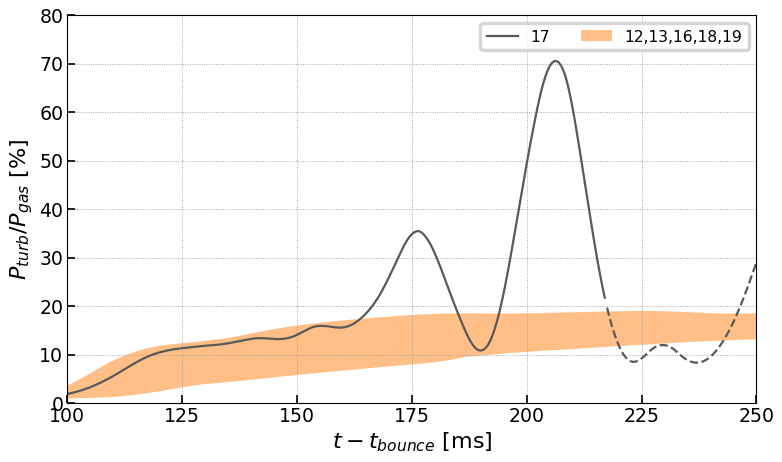

In [480]:
# Min max shock radius increase percentages

import os
import sys

sys.path.append("/home/pkarpov/Sapsan")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sapsan.utils import line_plot, plot_params
from scipy.signal import savgol_filter as savgol

def get_data(base_path, dataset):
    file1d = f'{base_path}{dataset}/plots/evolution.txt'
    vals = np.genfromtxt(file1d, skip_header=1)
    vals = np.moveaxis(vals,0,1)
    
    for j,var in enumerate(vals[0]):
        if var!=0: break    
    
    x = (vals[0][j:]-vals[0][j:][0])*1e3
    y = vals[-1][j:]#*1e-5
    
    if "baseline" in base_path: x += 2
    
    return x,y

style = 'tableau-colorblind10'
mpl.style.use(style)
mpl.rcParams.update(plot_params()) 

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']                       

# base_path_1        = '/home/pkarpov/scratch/1dccsn/sfho_s/production/stan_fix/baseline/'
base_path_2        = '/home/pkarpov/scratch/1dccsn/sfho_s/production/stan_fix/ml/'

fig = plt.figure(figsize=(10,6), dpi=80)
ax  = fig.add_subplot(111)

# masses = [12.0,13.0,16.0,17.0,18.0,19.0]
masses = [13.0,16.0,18.0,19.0,12.0]

datasets = [f's{m}_g9k_c8.4k_p0.3k' for m in masses]
# datasets = [f's{m}_g2k_c1.4k_p0.3k' for m in masses]
m,res = datasets[0].split('_')[:2]

filt_y = True

grids    = [1.5, 2, 4, 6, 9] 
grid     = datasets[0].split('_')[1]

minmax = np.zeros((len(masses),1000))

for i, dataset in enumerate(datasets): 
    # x1, y1 = get_data(base_path_1, dataset)
    x2, y2 = get_data(base_path_2, dataset)
    
    if filt_y: 
    #     # y1=savgol(y1, 50, 2)
        y2=savgol(y2, 50, 2)*100
        y2=savgol(y2, 50, 2)
    
    if masses[i]==17.0: icolor = 3
    else: icolor=i
    
    try: y = y2
    except: y = y2
    
    minmax[i][:len(y)] = y
    
    # if masses[i]==12: ax.plot(x2, y, '-', color=colors[icolor], lw=1)#, label = '%d with $P_{turb}$'%(round(masses[i])))
    if masses[i]==19: minmax[i][len(y):len(y)+50]=max(y)
    
spreadmin = [minmax[-1,i]-min(minmax[:,i]) for i in range(len(minmax[-1]))]
spreadmax = [max(minmax[:,i])-minmax[-1,i] for i in range(len(minmax[-1]))]

# Shade the 17 Msol exploded sim
dataset = 's17.0_g9k_c8.4k_p0.3k'
# x1, y1 = get_data(base_path_1, dataset)
xexp, y2 = get_data(base_path_2, dataset)
icolor = 3

if filt_y: 
    # y1=savgol(y1, 50, 2)
    y2=savgol(y2, 50, 2)*100
    y2=savgol(y2, 50, 2)

minmax_exp = np.zeros((1,1000))
yexp = y2
minmax_exp[0][:len(yexp)] = yexp

print(np.argmax(yexp), yexp[np.argmax(yexp)])

spreadmin_exp = [minmax_exp[0,i]-min(minmax[:,i]) for i in range(len(minmax[-1]))]
spreadmax_exp = [max(minmax[:,i])-minmax_exp[0,i] for i in range(len(minmax[-1]))]
for i in range(len(spreadmin_exp)):
    if spreadmin_exp[i]<0: spreadmin_exp[i]=0
plt.plot(xexp[:-146], yexp[:-146], color=colors[icolor],linewidth=2,label='17')
plt.plot(xexp[-146:], yexp[-146:], color=colors[icolor],linewidth=2, linestyle='--')
# plt.fill_between(xexp, yexp-np.abs(spreadmin_exp[:len(yexp)]), yexp, alpha=0.3, label='17')

plt.fill_between(x2, y-np.abs(spreadmin[:len(y)]), y+np.abs(spreadmax[:len(y)]), facecolor=[colors[1]],alpha=0.5,label='12,13,16,18,19')

ax.legend(loc=0, ncols=2)
ax.set_xlim(100,250)
# ax.set_xlim(150,220)
ax.set_ylim(0,80)
ax.xaxis.set_ticks(np.arange(100,275,25))
# ax.xaxis.set_ticks(np.arange(150,230,10))


ax.set_xlabel(r'$t-t_{bounce}$ [ms]')
ax.set_ylabel('$P_{turb}/P_{gas}$ [%]')
# ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
# ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
fig.tight_layout()

print(base_path_2)
# plt.savefig(f'{base_path_2}pturb_pgas_{res}_paper.png')

/home/pkarpov/scratch/1dccsn/sfho_s/production/stan_fix/ml/


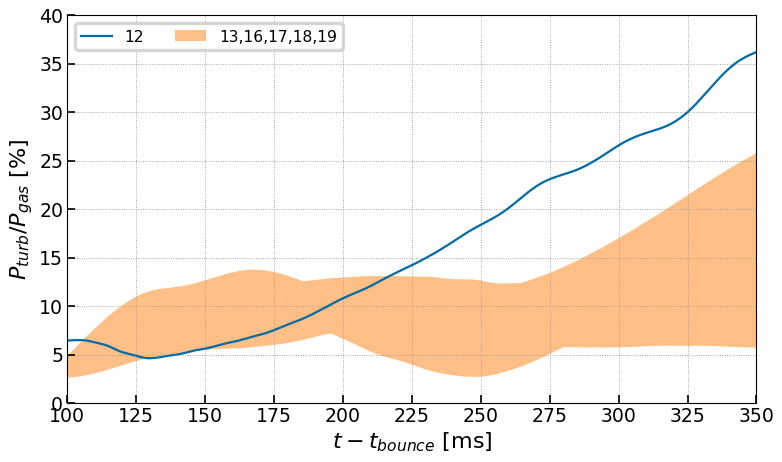

In [7]:
# Min max shock radius increase percentages

import os
import sys

sys.path.append("/home/pkarpov/Sapsan")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sapsan.utils import line_plot, plot_params
from scipy.signal import savgol_filter as savgol

def get_data(base_path, dataset):
    file1d = f'{base_path}{dataset}/plots/evolution.txt'
    vals = np.genfromtxt(file1d, skip_header=1)
    vals = np.moveaxis(vals,0,1)
    
    for j,var in enumerate(vals[0]):
        if var!=0: break    
    
    x = (vals[0][j:]-vals[0][j:][0])*1e3
    y = vals[-1][j:]#*1e-5
    
    if "baseline" in base_path: x += 2
    
    return x,savgol(y, 50, 2)

style = 'tableau-colorblind10'
mpl.style.use(style)
mpl.rcParams.update(plot_params()) 

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']                       

base_path_1        = '/home/pkarpov/scratch/1dccsn/sfho_s/production/stan_fix/baseline/'
base_path_2        = '/home/pkarpov/scratch/1dccsn/sfho_s/production/stan_fix/ml/'

fig = plt.figure(figsize=(10,6), dpi=80)
ax  = fig.add_subplot(111)

masses = [13.0,
          16.0,
          18.0,
          19.0,
          17.0]

datasets = [f's{m}_g2k_c1.4k_p0.3k' for m in masses]
m,res = datasets[0].split('_')[:2]

filt_y = True

grids    = [1.5, 2, 4, 6, 9] 
grid     = datasets[0].split('_')[1]

minmax = np.zeros((len(masses),1500))

for i, dataset in enumerate(datasets): 
    x1, y1 = get_data(base_path_1, dataset)
    x2, y2 = get_data(base_path_2, dataset)
    
    if filt_y: 
        y1=savgol(y1, 140, 2)*100
        y2=savgol(y2, 140, 2)*100
    
    if masses[i]==12.0: icolor = 3
    else: icolor=i
    
    try: y = y2
    except: y = y2
    
    minmax[i][:len(y)] = y
    # ax.plot(x2, y, '-', lw=1, label=masses[i])
    # if masses[i]==12: ax.plot(x2, y, '-', color=colors[icolor], lw=1)#, label = '%d with $P_{turb}$'%(round(masses[i])))
    if masses[i] in [13,19]: minmax[i][len(y):len(y)+100]=max(y)    
    
spreadmin = [minmax[-1,i]-min(minmax[:,i]) for i in range(len(minmax[-1]))]
spreadmax = [max(minmax[:,i])-minmax[-1,i] for i in range(len(minmax[-1]))]

# Shade the 12 Msol exploded sim
dataset = 's12.0_g2k_c1.4k_p0.3k'
x1, y1 = get_data(base_path_1, dataset)
xexp, y2 = get_data(base_path_2, dataset)
icolor = 0

if filt_y: 
    y1=savgol(y1, 70, 2)*100
    y2=savgol(y2, 70, 2)*100

minmax_exp = np.zeros((1,1500))
yexp = y2
minmax_exp[0][:len(yexp)] = yexp

spreadmin_exp = [minmax_exp[0,i]-min(minmax[:,i]) for i in range(len(minmax[-1]))]
spreadmax_exp = [max(minmax[:,i])-minmax_exp[0,i] for i in range(len(minmax[-1]))]

plt.plot(xexp[:len(yexp)], yexp, color=colors[icolor],linewidth=2,label='12')

# plt.fill_between(xexp[:len(yexp)], yexp-np.abs(spreadmin_exp[:len(yexp)]), yexp, alpha=0.3, label='12')
plt.fill_between(x2, y-np.abs(spreadmin[:len(y)]), y+np.abs(spreadmax[:len(y)]), facecolor=colors[1],alpha=0.5, label='13,16,17,18,19')

ax.legend(loc=2, ncols=2)
ax.set_xlim(100,350)
ax.set_ylim(0,40)
ax.xaxis.set_ticks(np.arange(100,375,25))

ax.set_xlabel(r'$t-t_{bounce}$ [ms]')
ax.set_ylabel('$P_{turb}/P_{gas}$ [%]')
# ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
# ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
fig.tight_layout()

print(base_path_2)
plt.savefig(f'{base_path_2}pturb_pgas_{res}_paper.png')

s12.0_g9k_c8.4k_p0.3k 112.38000000000001 348
s17.0_g9k_c8.4k_p0.3k 111.36999999999999 433
s19.0_g9k_c8.4k_p0.3k 110.32999999999998 469
s12.0_g9k_c8.4k_p0.3k 151.88 427
s17.0_g9k_c8.4k_p0.3k 150.86999999999998 512
s19.0_g9k_c8.4k_p0.3k 149.82999999999996 548
s12.0_g9k_c8.4k_p0.3k 177.38000000000002 478
s17.0_g9k_c8.4k_p0.3k 176.37 563
s19.0_g9k_c8.4k_p0.3k 175.32999999999998 599


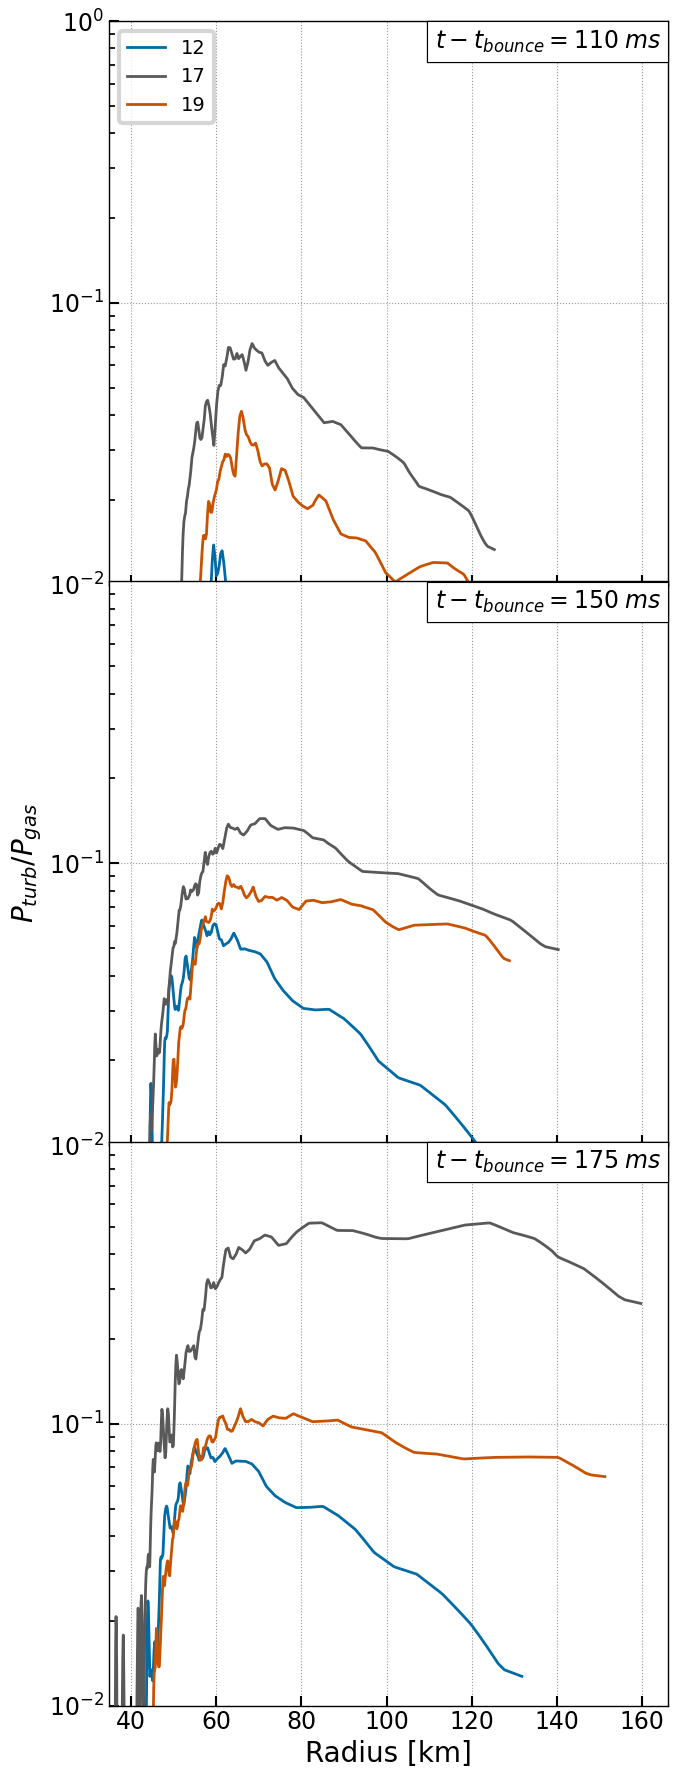

In [609]:
# Pturb/Pgas percentage plots

import os
import sys

sys.path.append("/home/pkarpov/Sapsan")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sapsan.utils import line_plot, plot_params
from scipy.signal import savgol_filter as savgol

def open_checkpoint(base_file, base_path, dataset, i, fullout=True):
    file   = f'{base_file}.{i+1}'
    file1d = f'{base_path}{dataset}/{file}' 
        
    with open(file1d, "r") as file:
        line = file.readline()                                                                                                      
        header_vals = file.readline()
        vals_strip  = header_vals[:-1].split(' ')                           
            
        vals_float = []
        for x in vals_strip:
            if x!='': 
                try: vals_float.append(float(x))
                except: vals_float.append(0.0)
        if len(vals_float)==9: time1d, bounce_time, pns_ind, pns_x, shock_ind, shock_x, rlumnue, rlumnueb, rlumnux = vals_float
        else:
            time1d, bounce_time, pns_ind, pns_x, shock_ind, shock_x, rlumnue = vals_float
            rlumnueb = 0
            rlumnux  = 0
            sys.exit()
        header = file.readline() 
        header = header.split(' ')
        header = list(filter(None, header))            

    pns_ind   = int(pns_ind)-1
    shock_ind = int(shock_ind)-1
                
    ps = np.genfromtxt(file1d, skip_header=3)
    ps = np.moveaxis(ps,0,1)
            
    if fullout: return ps,time1d,bounce_time,pns_ind,pns_x,shock_ind,shock_x,rlumnue,rlumnueb,rlumnux
    else: return ps,time1d,bounce_time

style = 'tableau-colorblind10'
mpl.style.use(style)
mpl.rcParams.update(plot_params()) 

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']                       

base_path = '/home/pkarpov/scratch/1dccsn/sfho_s/production/stan_fix/ml/'
masses    = [12.0,17.0,19.0]#,13.0,16.0,17.0,18.0,19.0]
# dataset   = '_g8k_c7k_p0.6k'
dataset   = '_g9k_c8.4k_p0.3k'
savepath  = 'shock_evolution_g9k_paper.png'

bounce = {12:166,17:251,19:287}
# step   = [200,300,310]
# step   = [211,261,311]
step   = [182,261,312]

datasets = [f's{m}{dataset}' for m in masses]

# fig = plt.figure(figsize=(6,6), dpi=80)
# ax  = fig.add_subplot(111)

fig, axs = plt.subplots(3, 1, sharex=True, figsize=(7,18))
fig.subplots_adjust(hspace=0)

xmin=1.5e9
xmax=-1
for j in range(3):
    for i, dataset in enumerate(datasets): 
        vals,time1d,bounce_time,pns_ind,pns_x,shock_ind,shock_x,rlumnue,rlumnueb,rlumnux = open_checkpoint('DataOut_read', base_path, dataset, bounce[round(masses[i])]+step[j])

        print(dataset, ((time1d-bounce_time)*1e3), bounce[round(masses[i])]+step[j])
        
        cm2km = 1e-5
        r     = vals[2]*1e-5
        Pgas  = vals[6]
        Pturb = vals[10]

        match masses[i]:
            case 12: icolor=0
            case 17: icolor=3
            case 19: icolor=5

        shock_shift = 1         
        axs[j].semilogy(r[:shock_ind-shock_shift],(Pturb/Pgas)[:shock_ind-shock_shift], lw=2, label=round(masses[i]), color=colors[icolor])
        if pns_x<xmin: xmin = pns_x
        if shock_x > xmax: xmax = r[shock_ind-1]/cm2km
    
        axs[j].text(164.5,0.8, '$t-t_{bounce}=%.f \;ms$'%((time1d-bounce_time)*1e3), 
                horizontalalignment='right', fontsize=17,
                bbox=dict(boxstyle='square', facecolor='white',linewidth=0.8)) 

        if j>0: axs[j].yaxis.set_ticks([1e-2,1e-1])

        axs[j].set_xlim([xmin*cm2km,xmax*cm2km])
        axs[j].set_ylim([1e-2,1e0])
        plt.xlabel('Radius [km]')
        if j==1: axs[j].set_ylabel(r'$P_{turb}/P_{gas}$')
        axs[0].legend(loc=2, ncols=1)

fig.tight_layout(h_pad=-1)

plt.savefig(f'{base_path}Pturb_evolution_g9k.png')

115.38000000000001
115.19999999999997
115.37
115.32999999999998
179.88000000000002
179.69999999999996
179.87
179.82999999999998
250.38000000000005
250.2
250.32999999999998


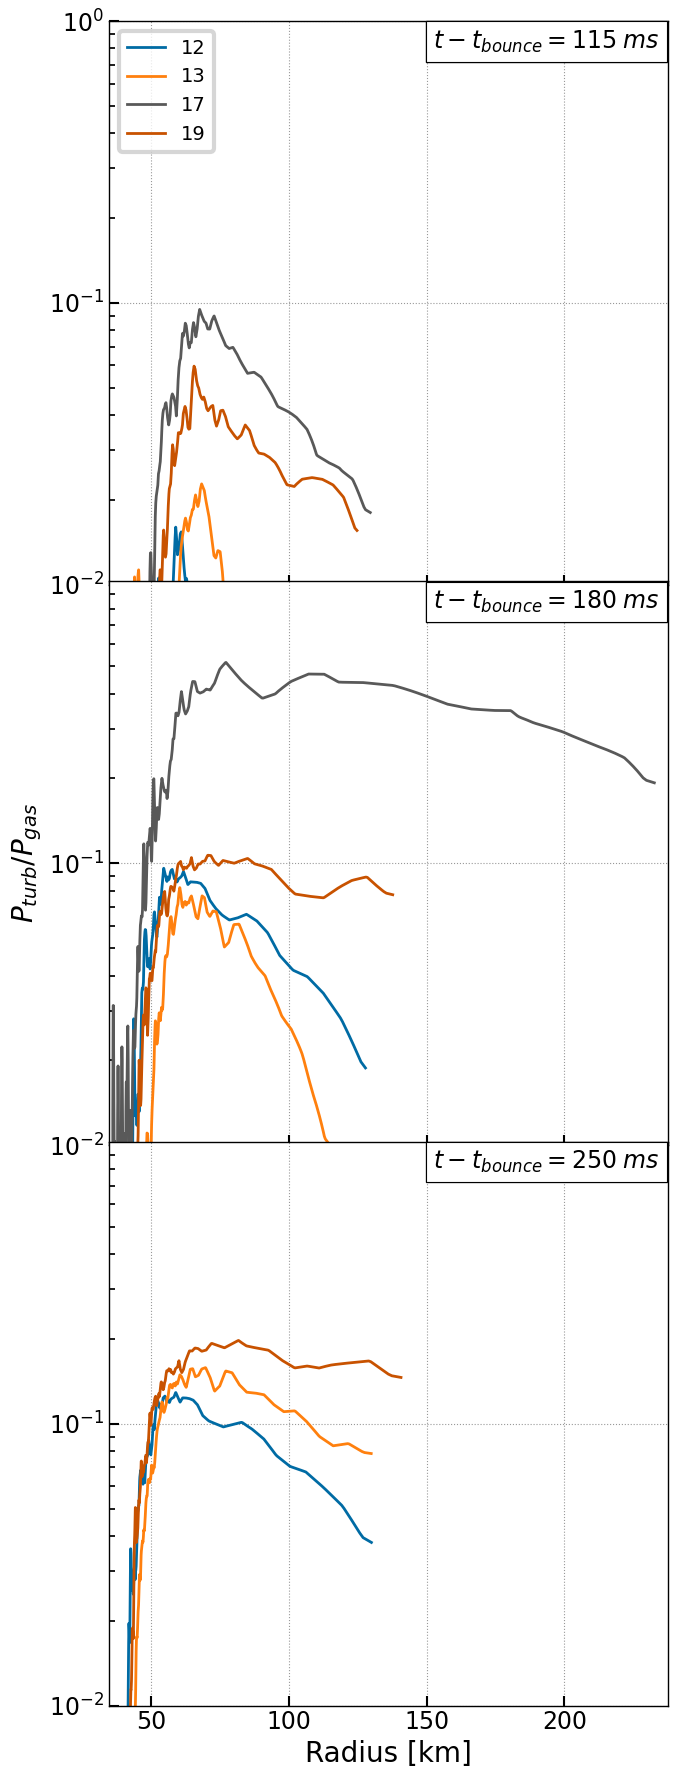

In [820]:

# Pturb/Pgas percentage plots

import os
import sys

sys.path.append("/home/pkarpov/Sapsan")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sapsan.utils import line_plot, plot_params
from scipy.signal import savgol_filter as savgol

def open_checkpoint(base_file, base_path, dataset, i, fullout=True):
    file   = f'{base_file}.{i+1}'
    file1d = f'{base_path}{dataset}/{file}' 
        
    with open(file1d, "r") as file:
        line = file.readline()                                                                                                      
        header_vals = file.readline()
        vals_strip  = header_vals[:-1].split(' ')                           
            
        vals_float = []
        for x in vals_strip:
            if x!='': 
                try: vals_float.append(float(x))
                except: vals_float.append(0.0)
        if len(vals_float)==9: time1d, bounce_time, pns_ind, pns_x, shock_ind, shock_x, rlumnue, rlumnueb, rlumnux = vals_float
        else:
            time1d, bounce_time, pns_ind, pns_x, shock_ind, shock_x, rlumnue = vals_float
            rlumnueb = 0
            rlumnux  = 0
            sys.exit()
        header = file.readline() 
        header = header.split(' ')
        header = list(filter(None, header))            

    pns_ind   = int(pns_ind)-1
    shock_ind = int(shock_ind)-1
                
    ps = np.genfromtxt(file1d, skip_header=3)
    ps = np.moveaxis(ps,0,1)
            
    if fullout: return ps,time1d,bounce_time,pns_ind,pns_x,shock_ind,shock_x,rlumnue,rlumnueb,rlumnux
    else: return ps,time1d,bounce_time

style = 'tableau-colorblind10'
mpl.style.use(style)
mpl.rcParams.update(plot_params()) 

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']                       

base_path = '/home/pkarpov/scratch/1dccsn/sfho_s/production/stan_fix/ml/'
masses    = [12.0,13.0,17.0,19.0]#,13.0,16.0,17.0,18.0,19.0]
# dataset   = '_g8k_c7k_p0.6k'
dataset   = '_g9k_c8.4k_p0.3k'
savepath  = 'shock_evolution_g9k_paper.png'

# bounce = {12:162,17:249,19:287}
bounce = {12:125,13:227,17:212,19:250}
# step   = [200,300,310]
# step   = [211,261,311]
# step   = [229,299,358]
step   = [229,358,499]

datasets = [f's{m}{dataset}' for m in masses]

# fig = plt.figure(figsize=(6,6), dpi=80)
# ax  = fig.add_subplot(111)

fig, axs = plt.subplots(3, 1, sharex=True, figsize=(7,18))
fig.subplots_adjust(hspace=0)

xmin=1.5e9
xmax=-1
for j in range(3):
    for i, dataset in enumerate(datasets): 
        if masses[i]==17 and j==2: continue
        vals,time1d,bounce_time,pns_ind,pns_x,shock_ind,shock_x,rlumnue,rlumnueb,rlumnux = open_checkpoint('DataOut_read', base_path, dataset, bounce[round(masses[i])]+step[j])
        print((time1d-bounce_time)*1e3)
        cm2km = 1e-5
        r     = vals[2]*1e-5
        rho   = vals[3]
        Pgas  = vals[6]
        Pturb = vals[10]

        match masses[i]:
            case 12: icolor=0
            case 13: icolor=1
            case 17: icolor=3
            case 19: icolor=5

        if j==0 and masses[i]==13: shock_shift=50            
        else: shock_shift = 1         
        axs[j].semilogy(r[:shock_ind-shock_shift],(Pturb/Pgas)[:shock_ind-shock_shift], lw=2, label=round(masses[i]), color=colors[icolor])
        if pns_x<xmin: xmin = pns_x
        if shock_x > xmax: xmax = r[shock_ind-1]/cm2km
    
        axs[j].text(
                    234.5,0.8, 
                    # 164,0.8,
                    '$t-t_{bounce}=%.f \;ms$'%((time1d-bounce_time)*1e3), 
                horizontalalignment='right', fontsize=17,
                bbox=dict(boxstyle='square', facecolor='white',linewidth=0.8)) 

        if j>0: axs[j].yaxis.set_ticks([1e-2,1e-1])

        axs[j].set_xlim([xmin*cm2km,xmax*cm2km])
        axs[j].set_ylim([1e-2,1e0])
        plt.xlabel('Radius [km]')
        if j==1: axs[j].set_ylabel(r'$P_{turb}/P_{gas}$')
        axs[0].legend(loc=2, ncols=1)

fig.tight_layout(h_pad=-1)

# plt.savefig(f'{base_path}Pturb_evolution_g9k.png')

111.36999999999999 688
111.36999999999999 688
111.36999999999999 688
111.36999999999999 688
111.36999999999999 688
111.36999999999999 688
150.86999999999998 767
150.86999999999998 767
150.86999999999998 767
150.86999999999998 767
150.86999999999998 767
150.86999999999998 767
176.37 818
176.37 818
176.37 818
176.37 818
176.37 818
176.37 818


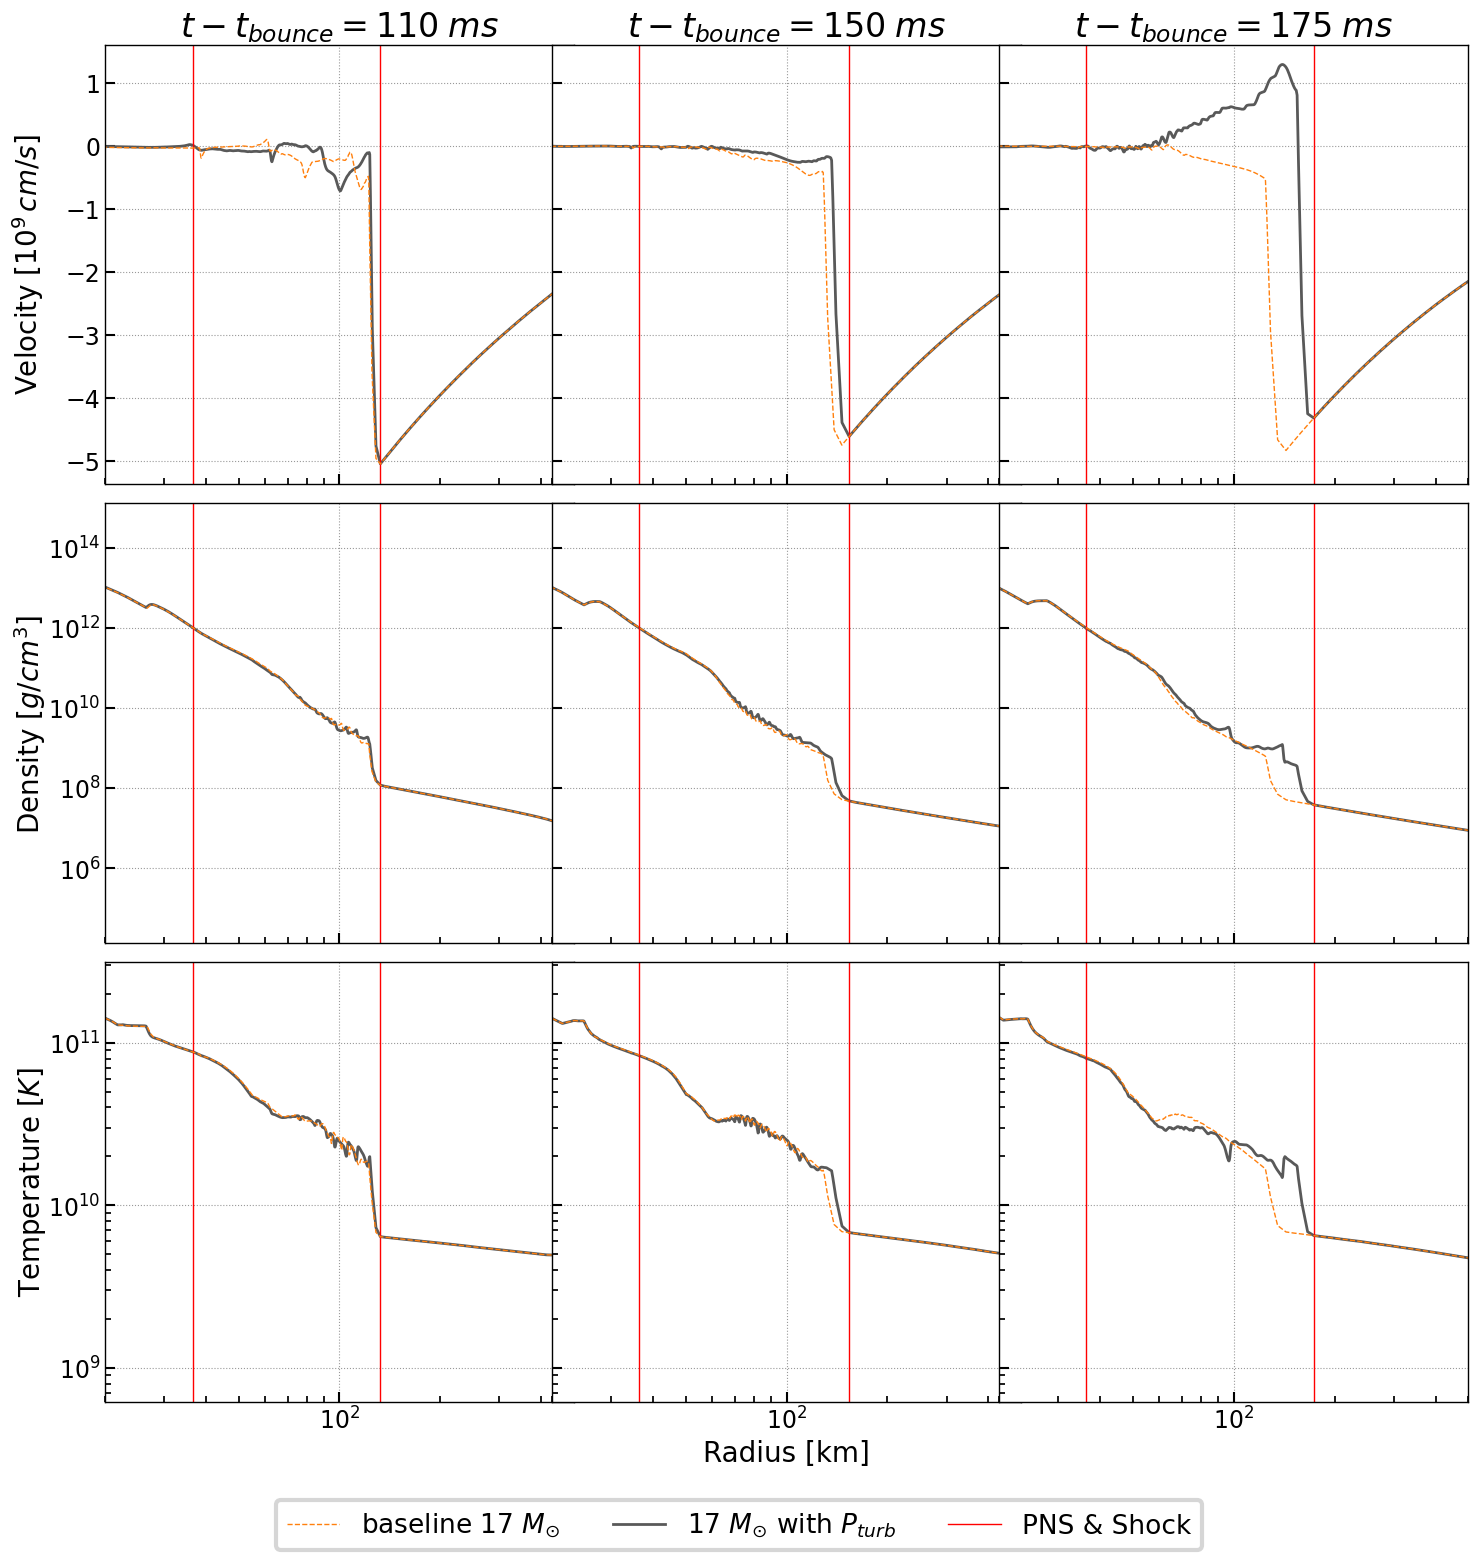

In [420]:
# Pturb/Pgas percentage plots

import os
import sys

sys.path.append("/home/pkarpov/Sapsan")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sapsan.utils import line_plot, plot_params
from scipy.signal import savgol_filter as savgol

def open_checkpoint(base_file, base_path, dataset, i, fullout=True):
    file   = f'{base_file}.{i+1}'
    file1d = f'{base_path}{dataset}/{file}' 
        
    with open(file1d, "r") as file:
        line = file.readline()                                                                                                      
        header_vals = file.readline()
        vals_strip  = header_vals[:-1].split(' ')                           
            
        vals_float = []
        for x in vals_strip:
            if x!='': 
                try: vals_float.append(float(x))
                except: vals_float.append(0.0)
        if len(vals_float)==9: time1d, bounce_time, pns_ind, pns_x, shock_ind, shock_x, rlumnue, rlumnueb, rlumnux = vals_float
        else:
            time1d, bounce_time, pns_ind, pns_x, shock_ind, shock_x, rlumnue = vals_float
            rlumnueb = 0
            rlumnux  = 0
            sys.exit()
        header = file.readline() 
        header = header.split(' ')
        header = list(filter(None, header))            

    pns_ind   = int(pns_ind)-1
    shock_ind = int(shock_ind)-1
                
    ps = np.genfromtxt(file1d, skip_header=3)
    ps = np.moveaxis(ps,0,1)
            
    if fullout: return ps,time1d,bounce_time,pns_ind,pns_x,shock_ind,shock_x,rlumnue,rlumnueb,rlumnux
    else: return ps,time1d,bounce_time

style = 'tableau-colorblind10'
mpl.style.use(style)
mpl.rcParams.update(plot_params()) 

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']                       

base_path = '/home/pkarpov/scratch/1dccsn/sfho_s/production/stan_fix/ml/'
masses    = [17.0,
             #17.0,19.0
             ]#,13.0,16.0,17.0,18.0,19.0]
# dataset   = '_g8k_c7k_p0.6k'
dataset   = '_g9k_c8.4k_p0.3k'
savepath  = 'shock_evolution_g9k_paper.png'

# bounce = {12:162,17:251,19:287}
# bounce = {12:125,17:212,19:250}
# step   = [200,300,310]
# step   = [211,261,311]
# step   = [182,251,312]
# step   = [229,279,352]
# step   = [229,299,358]

bounce = {12:168,17:255,19:287}
# step   = [200,300,310]
# step   = [211,261,311]
# step   = [186,265,316]

# s12.0_g9k_c8.4k_p0.3k 348
# s17.0_g9k_c8.4k_p0.3k 433
# s19.0_g9k_c8.4k_p0.3k 469
# s12.0_g9k_c8.4k_p0.3k 427
# s17.0_g9k_c8.4k_p0.3k 512
# s19.0_g9k_c8.4k_p0.3k 548
# s12.0_g9k_c8.4k_p0.3k 478
# s17.0_g9k_c8.4k_p0.3k 563
# s19.0_g9k_c8.4k_p0.3k 599

step = [433,512,563]

datasets = [f's{m}{dataset}' for m in masses]

# fig = plt.figure(figsize=(6,6), dpi=80)
# ax  = fig.add_subplot(111)

fig, axs = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(15,15))
fig.subplots_adjust(wspace=0)

ylabels = ['Velocity [$10^9\,cm/s$]', 'Density [$g/cm^3$]', 'Temperature [$K$]']

xmin=1.5e9
xmax=-1
for k in range(3):
    for j in range(3):
        for i, dataset in enumerate(datasets): 
            vals,time1d,bounce_time,pns_ind,pns_x,shock_ind,shock_x,rlumnue,rlumnueb,rlumnux = open_checkpoint('DataOut_read', base_path, dataset, step[k])

            print((time1d-bounce_time)*1e3, bounce[round(masses[i])]+step[k])
            
            cm2km = 1e-5
            r     = vals[2]*1e-5
            rho   = vals[3]
            v     = vals[4]/1e9                
            Pgas  = vals[6]
            T     = vals[7]
            Pturb = vals[10]
            
            y = np.array([v, rho, T])

            match masses[i]:
                case 12: icolor=0
                case 17: icolor=3
                case 19: icolor=5

            shock_shift = 1   
            if j==0: axs[j,k].semilogx(r,y[j], lw=2, label='17 $M_{\odot}$ with $P_{turb}$', color=colors[icolor])      
            else: axs[j,k].loglog(r,y[j], lw=2, label='17 $M_{\odot}$ with $P_{turb}$', color=colors[icolor])
            
            axs[j,k].axvline(r[pns_ind], color='r',linewidth=1)
            axs[j,k].axvline(r[shock_ind], color='r',linewidth=1, label='PNS & Shock')

            if pns_x<xmin: xmin = pns_x
            if shock_x > xmax: xmax = r[shock_ind-1]/cm2km                    

            if k>0: axs[j,k].xaxis.set_ticks([1e2,1e3])  
            # if k==0 and j==1: 
                # axs[j,k].xaxis.set_ticks([1e1])
            else: axs[j,k].xaxis.set_ticks([1e1,1e2,1e3])

            # axs[j,k].set_xlim([xmin*cm2km,xmax*cm2km])
            # axs[j,k].set_ylim([1e-2,1e0])            
            if j==0: 
                labelpad=14
                # axs[j,k].text(1e3,0.8, '$t-t_{bounce}=%.f \;ms$'%((time1d-bounce_time)*1e3), 
                #     horizontalalignment='right', fontsize=17,
                #     bbox=dict(boxstyle='square', facecolor='white',linewidth=0.8)) 
                axs[j,k].set_title('$t-t_{bounce}=%.f \;ms$'%((time1d-bounce_time)*1e3-1))
            else: labelpad=0
            if k==0: axs[j,k].set_ylabel(ylabels[j], labelpad=labelpad)
            # axs[0,0].legend(loc=2, ncols=1)
            axs[j,k].set_xlim(2e1,5e2)
            
            # Add baseline curve
            vals,time1d,bounce_time,pns_ind,pns_x,shock_ind,shock_x,rlumnue,rlumnueb,rlumnux = open_checkpoint('DataOut_read', base_path[:-3]+'baseline/', dataset, step[k])

            print((time1d-bounce_time)*1e3, bounce[round(masses[i])]+step[k])
            
            cm2km = 1e-5
            r     = vals[2]*1e-5
            rho   = vals[3]
            v     = vals[4]/1e9                
            Pgas  = vals[6]
            T     = vals[7]
            Pturb = vals[10]
            
            y = np.array([v, rho, T])

            match masses[i]:
                case 12: icolor=0
                case 17: icolor=3
                case 19: icolor=5

            shock_shift = 1   
            if j==0: axs[j,k].semilogx(r,y[j], lw=1, linestyle='--',label='baseline 17 $M_{\odot}$', color=colors[1])      
            else: axs[j,k].loglog(r,y[j], lw=1, linestyle='--',label='baseline 17 $M_{\odot}$', color=colors[1])
            
            # if j==2 and k==1: axs[j,k].legend(ncols=3, bbox_to_anchor=(0.3, -0.3), loc='lower center')
            
axs[2,1].set_xlabel('Radius [km]')

handles, labels = axs[2,1].get_legend_handles_labels()
handles[1], handles[2] = handles[2], handles[1]
handles[0], handles[1] = handles[1], handles[0]
labels[1],  labels[2]  = labels[2],  labels[1]
labels[0],  labels[1]  = labels[1],  labels[0]
fig.legend(handles, labels, ncols=3, fontsize = 19, bbox_to_anchor=(0.5, -0.05), loc='lower center')

fig.tight_layout(h_pad=1, w_pad=-1.1)

plt.savefig(f'{base_path}inference_features_g9k.png', bbox_inches='tight')

0.20036999999999996
0.20033
/home/pkarpov/scratch/1dccsn/sfho_s/production/stan_fix/baseline/


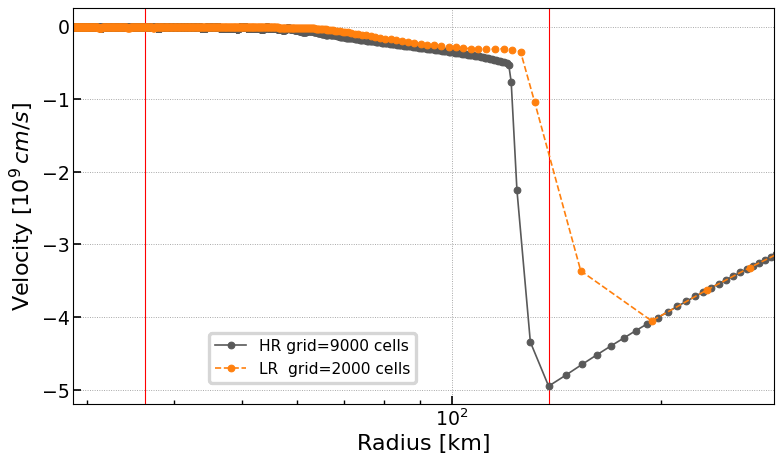

In [388]:
base_path = '/home/pkarpov/scratch/1dccsn/sfho_s/production/stan_fix/baseline/'
datasets  = ['s17.0_g9k_c8.4k_p0.3k','s17.0_g2k_c1.4k_p0.3k']

fig = plt.figure(figsize=(10,6), dpi=80)
ax  = fig.add_subplot(111)
chk_g9k = 611#371#512
for dataset in datasets:
    if 'g9k' in dataset: checkpoint = chk_g9k
    elif 'g2k' in dataset: checkpoint = chk_g9k-7
    vals,time1d,bounce_time,pns_ind,pns_x,shock_ind,shock_x,rlumnue,rlumnueb,rlumnux = open_checkpoint('DataOut_read', base_path, dataset, checkpoint)
    print(time1d-bounce_time)
    msol    = 1.989e33

    encm    = vals[1]
    r       = vals[2]*1e-5
    rho     = vals[3]
    v       = vals[4]/1e9
    dm      = np.zeros(r.shape)
    dm[0]   = rho[0]*4/3*np.pi*r[0]**3/msol

    for i in range(1,len(r)):
        dm[i] = 4/3*np.pi*rho[i]*(r[i]**3-r[i-1]**3)/msol                        

    if 'g9k' in dataset:
        color = colors[3]
        ax.axvline(r[pns_ind], color='r',linewidth=1)
        ax.axvline(r[shock_ind], color='r',linewidth=1)
        ax.semilogx(r,v,marker='o',linewidth=1.5,color=color,label='HR grid=9000 cells')        
    else:
        color = colors[1]
        ax.semilogx(r,v,marker='o',linewidth=1.5,linestyle='--',color=color,label='LR  grid=2000 cells')

ax.legend(loc='upper right', bbox_to_anchor=(0.5, 0.2))
ax.set_xlim(r[pns_ind]*0.9,r[shock_ind]*1.5)
ax.set_xlabel('Radius [km]')
ax.set_ylabel('Velocity [$10^9\,cm/s$]')

fig.tight_layout()

print(base_path)
plt.savefig(f'{base_path}shock_resolution.png')

/home/pkarpov/scratch/1dccsn/sfho_s/production/stan_fix/ml/


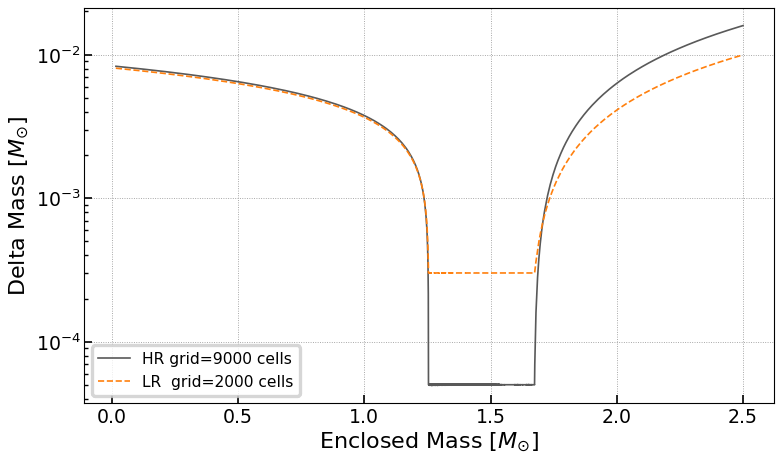

In [349]:
base_path = '/home/pkarpov/scratch/1dccsn/sfho_s/production/stan_fix/ml/'
dataset   = 's17.0_g9k_c8.4k_p0.3k'
vals,time1d,bounce_time,pns_ind,pns_x,shock_ind,shock_x,rlumnue,rlumnueb,rlumnux = open_checkpoint('DataOut_read', base_path, dataset, 1)

msol    = 1.989e33

encm    = vals[1]
r       = vals[2]
rho     = vals[3]
dm      = np.zeros(r.shape)
dm[0]   = rho[0]*4/3*np.pi*r[0]**3/msol

for i in range(1,len(r)):
    dm[i] = 4/3*np.pi*rho[i]*(r[i]**3-r[i-1]**3)/msol            
    
fig = plt.figure(figsize=(10,6), dpi=80)
ax  = fig.add_subplot(111)

ax.semilogy(encm[1:],dm[1:],linewidth=1.5,color = colors[3],label='HR grid=9000 cells')

# i=301
# ax.axvline(encm[i], color='r',linewidth=1.5, label=f'start at {i}')
# for i in range(len(dm)-2,-1,-1):
#     if abs(dm[i+1]-dm[i])<dm[i+1]*1e-3:
#         ax.axvline(encm[i], color='r',linewidth=1.5, linestyle='--',label=f'end at  {i}')
#         break

base_path = '/home/pkarpov/scratch/1dccsn/sfho_s/production/stan_fix/ml/'
dataset   = 's17.0_g2k_c1.4k_p0.3k'
vals,time1d,bounce_time,pns_ind,pns_x,shock_ind,shock_x,rlumnue,rlumnueb,rlumnux = open_checkpoint('DataOut_read', base_path, dataset, 1)

msol    = 1.989e33

encm    = vals[1]
r       = vals[2]
rho     = vals[3]
dm      = np.zeros(r.shape)
dm[0]   = rho[0]*4/3*np.pi*r[0]**3/msol

for i in range(1,len(r)):
    dm[i] = 4/3*np.pi*rho[i]*(r[i]**3-r[i-1]**3)/msol            

ax.semilogy(encm[1:],dm[1:],linewidth=1.5, linestyle='--', color = colors[1],label='LR  grid=2000 cells')

ax.legend(loc=3)
ax.set_xlabel(r'Enclosed Mass [$M_{\odot}$]', )
ax.set_ylabel(r'Delta Mass [$M_{\odot}$]',)

fig.tight_layout()

print(base_path)
plt.savefig(f'{base_path}grid.png')

/home/pkarpov/scratch/adam/s12.0.swbj15.horo.3d/dump_00105.h5
100.000000000001
/home/pkarpov/scratch/adam/s13.0.swbj15.horo.3d/dump_00105.h5
100.00000000000064
/home/pkarpov/scratch/adam/s17.0.swbj15.horo.3d/dump_00105.h5
101.00000000000036
/home/pkarpov/scratch/adam/s17.0.swbj15.horo.3d_combined/dump_00105.h5
101.00000000000036
/home/pkarpov/scratch/adam/s19.0.swbj15.horo.3d/dump_00105.h5
100.00000000000007
/home/pkarpov/scratch/adam/s12.0.swbj15.horo.3d/dump_00210.h5
199.00000000000037
/home/pkarpov/scratch/adam/s13.0.swbj15.horo.3d/dump_00210.h5
199.00000000000094
/home/pkarpov/scratch/adam/s17.0.swbj15.horo.3d/dump_00210.h5
201.0000000000006
/home/pkarpov/scratch/adam/s17.0.swbj15.horo.3d_combined/dump_00210.h5
201.0000000000006
/home/pkarpov/scratch/adam/s19.0.swbj15.horo.3d/dump_00210.h5
200.0000000000007
/home/pkarpov/scratch/adam/s12.0.swbj15.horo.3d/dump_00312.h5
296.0000000000006
/home/pkarpov/scratch/adam/s13.0.swbj15.horo.3d/dump_00312.h5
296.0000000000008
/home/pkarpov/scr

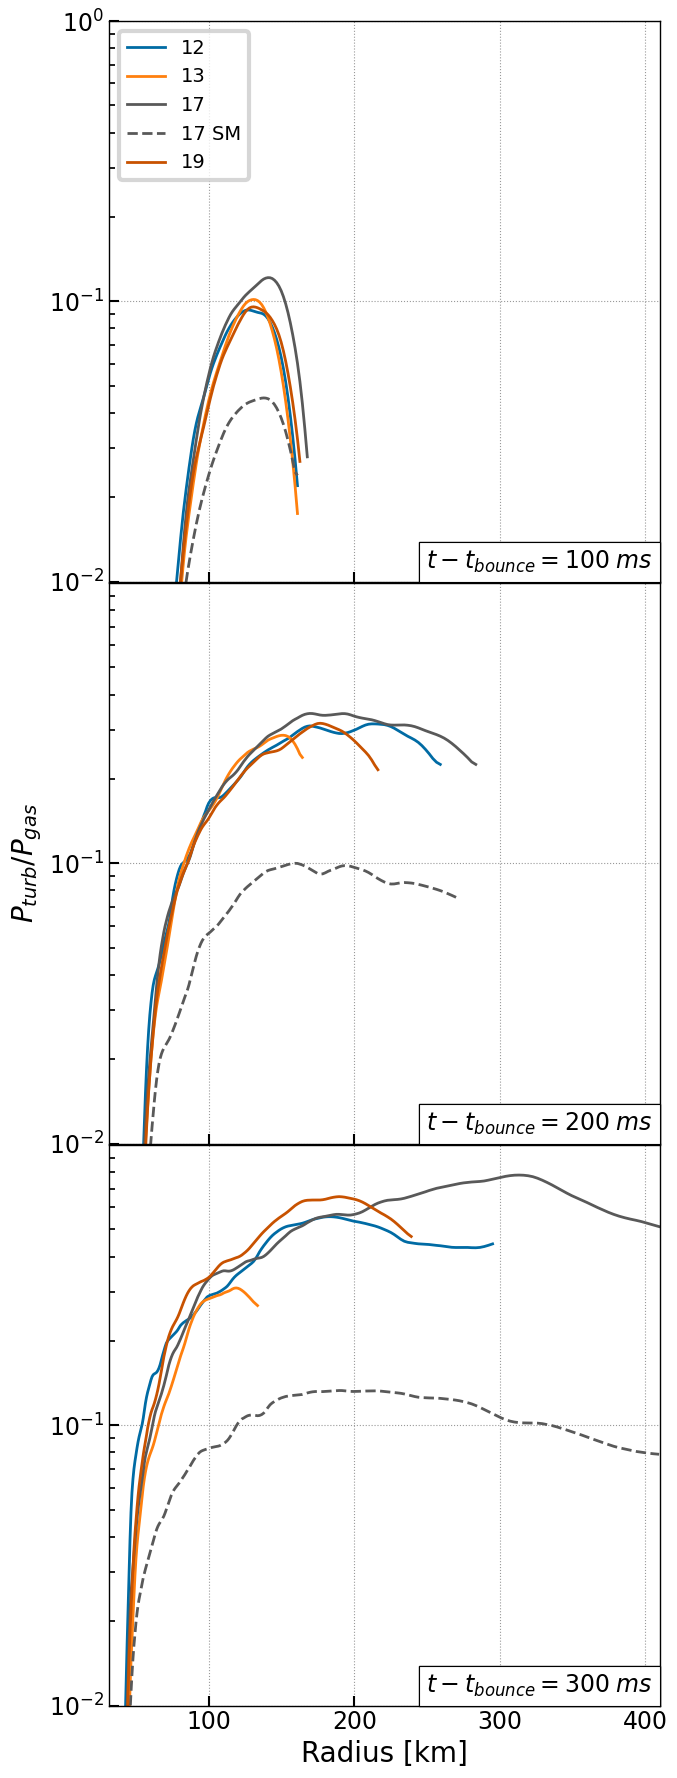

In [758]:
# Pturb/Pgas percentage plots

import os
import sys
import h5py as h5

sys.path.append("/home/pkarpov/Sapsan")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sapsan.utils import line_plot, plot_params
from scipy.signal import savgol_filter as savgol

def shock_radius(v, x, bump=0, old_shock_ind=-1):                        

    shock_ind = bump+np.argmin(v[bump:])
    shock_x   = x[shock_ind]

    return shock_ind, shock_x
    
def pns_radius(rho, x, rho_threshold = 1e12):      
        
    for i in range(len(rho)):            
        if rho[i] > rho_threshold:
            pns_ind = i
            pns_x   = x[i]
            
    return pns_ind, pns_x   

def h5open_checkpoint(base_file, base_path, dataset, i, fullout=True, s2=False):
    file   = base_file%i
    file1d = f'{base_path}{dataset}/{file}' 
    file_grid = f'{base_path}{dataset}/grid.h5'
           
    print(file1d)
    with h5.File(file_grid, 'r') as hf:
        r = np.array(hf['Z'])[1:]
    with h5.File(file1d, 'r') as hf:                
        time1d = np.array(hf['Time'])[0]*1e3
        Pgas   = np.array(hf['eos0'])        
        rho    = np.array(hf['rho'])
        v      = np.array(hf['u1'])        
        if s2: Pturb  = np.array(hf['Pturb_s2'])      
        else: Pturb  = np.array(hf['Pturb'])      

    pns_ind, pns_x     = pns_radius(rho, r)
    shock_ind, shock_x = shock_radius(v, r)
            
    return r,Pgas,Pturb,time1d,pns_ind,pns_x,shock_ind,shock_x

style = 'tableau-colorblind10'
mpl.style.use(style)
mpl.rcParams.update(plot_params()) 

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']                       

base_path = '/home/pkarpov/scratch/adam/'
masses    = [12.0,13.0,17.0,19.0]#,13.0,16.0,17.0,18.0,19.0]
# dataset   = '_g8k_c7k_p0.6k'
dataset   = '.swbj15.horo.3d'
savepath  = 'shock_evolution_adam.png'

bounce = {12:0,13:0,17:0,19:0}
# step   = [200,300,310]
# step   = [211,261,311]
# step = [105,158,210]
step = [105,210,312]

datasets = [f's{m}{dataset}' for m in masses]

# fig = plt.figure(figsize=(6,6), dpi=80)
# ax  = fig.add_subplot(111)

fig, axs = plt.subplots(3, 1, sharex=True, figsize=(7,18))
fig.subplots_adjust(hspace=0)

xmin=1.5e9
xmax=-1
for j in range(3):
    for i, dataset in enumerate(datasets):         
        r,Pgas,Pturb,time1d,pns_ind,pns_x,shock_ind,shock_x = h5open_checkpoint('dump_%05d.h5', base_path, dataset, bounce[round(masses[i])]+step[j])

        print(time1d)
        match masses[i]:
            case 12: icolor=0
            case 13: icolor=1
            case 17: icolor=3
            case 19: icolor=5
            
        match j:
            case 0: 
                match masses[i]:
                    case 12: shock_shift=8
                    case 13: shock_shift=8
                    case 17: shock_shift=8
                    case 19: shock_shift=8
            case 1:
                match masses[i]:
                    case 12: shock_shift=27
                    case 13: shock_shift=18
                    case 17: shock_shift=28
                    case 19: shock_shift=21
            case 2: 
                match masses[i]:
                    case 12: shock_shift=80
                    case 13: shock_shift=27
                    case 17: shock_shift=47
                    case 19: shock_shift=47
                            
        axs[j].semilogy(r[:shock_ind-shock_shift],(Pturb/Pgas)[:shock_ind-shock_shift], lw=2, label=round(masses[i]), color=colors[icolor])
        
        if masses[i]==17:# and j<2:            
            r,Pgas,Pturb,time1d,pns_ind,pns_x,shock_ind,shock_x = h5open_checkpoint('dump_%05d.h5', '/home/pkarpov/scratch/adam/', dataset+'_combined', bounce[round(masses[i])]+step[j], s2=True)
            print(time1d)
            axs[j].semilogy(r[:shock_ind-shock_shift-4],(Pturb/Pgas)[:shock_ind-shock_shift-4], lw=2, linestyle='--', label=f'{round(masses[i])} SM', color=colors[icolor])
        
        if pns_x < xmin: xmin = pns_x
        if shock_x > xmax: xmax = r[shock_ind-shock_shift]
    
        axs[j].text(405,0.0111, '$t-t_{bounce}=%.f \;ms$'%(time1d), 
                horizontalalignment='right', fontsize=17,
                bbox=dict(boxstyle='square', facecolor='white',linewidth=0.8)) 

        if j>0: axs[j].yaxis.set_ticks([1e-2,1e-1])

        # axs[j].set_xlim([xmin,xmax])
        axs[j].set_xlim([xmin,410])
        axs[j].set_ylim([1e-2,1e0])
        plt.xlabel('Radius [km]')
        if j==1: axs[j].set_ylabel(r'$P_{turb}/P_{gas}$')
        axs[0].legend(loc=2, ncols=1)

fig.tight_layout(h_pad=-0.75)

plt.savefig(f'{base_path}Pturb_evolution_adam.png')

/home/pkarpov/scratch/1dccsn/sfho_s/production/stan_fix/ml/


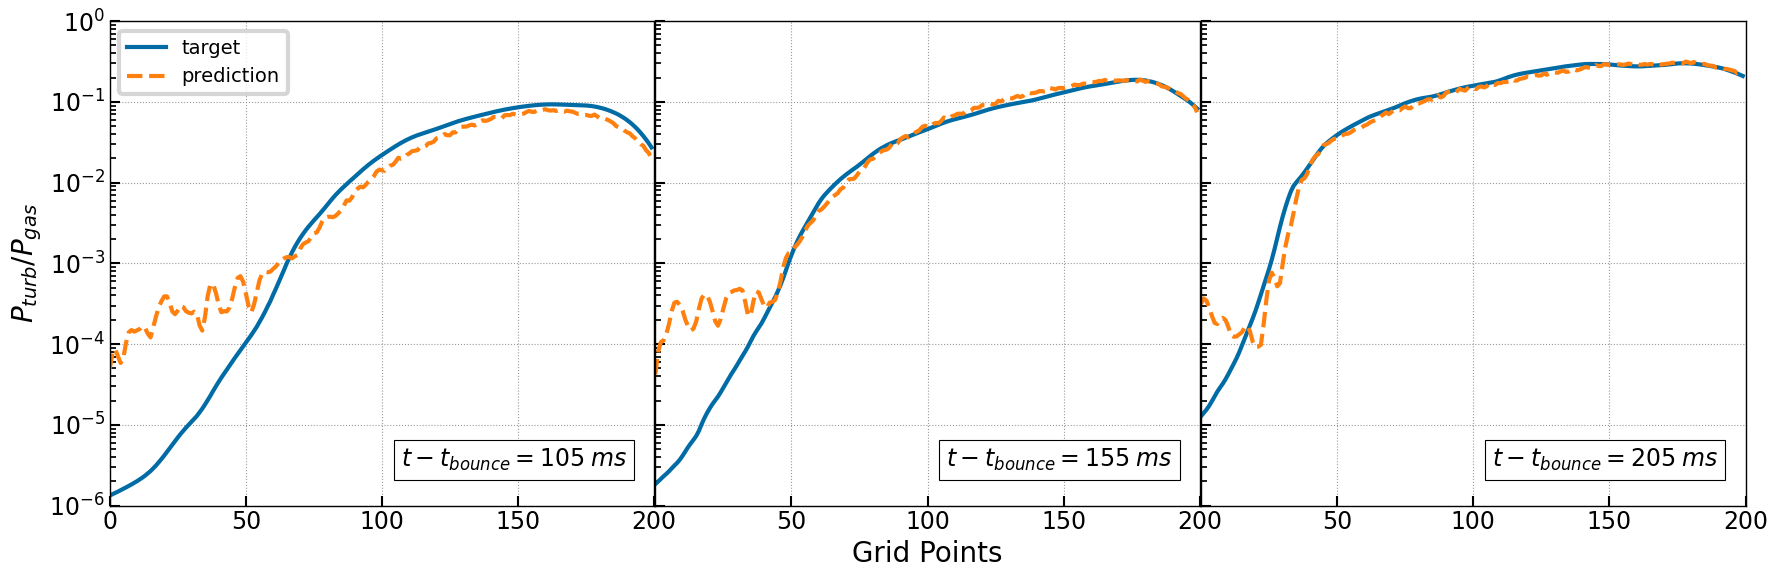

In [169]:
# Training results inferencing unseen Adam's data at 3 checkpoints
# NOTE: inference target is off by 1/3 to scale properly during training

style = 'tableau-colorblind10'
mpl.style.use(style)
mpl.rcParams.update(plot_params()) 

smass = 's12.0'
target_checkpoints = [105,155,205]
mlin_grid_size = 200
baseload = f'/home/pkarpov/COLLAPSO1D/py_utils/inference_output/'
x = np.arange(mlin_grid_size)

fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18,6))
fig.subplots_adjust(wspace=0)

for i, target_checkpoint in enumerate(target_checkpoints):
    vals = np.genfromtxt(f'{baseload}{smass}_{target_checkpoint}.txt', skip_header=1)
    vals = np.moveaxis(vals, 0, 1)

    ax = axs[i]
    ax.semilogy(x, vals[0]*3,label='target')
    ax.semilogy(x, vals[1]*3, '--', label='prediction')
    
    ax.text(190,3e-6, '$t-t_{bounce}=%.f \;ms$'%(target_checkpoint), 
                horizontalalignment='right', fontsize=17,
                bbox=dict(boxstyle='square', facecolor='white',linewidth=0.8)) 
    
    if i==0: 
        ax.legend(loc=2)
        ax.set_ylabel('$P_{turb}/P_{gas}$')
    if i==1: ax.set_xlabel('Grid Points')
    
    if i>0: ax.xaxis.set_ticks([50,100,150,200])
    ax.set_xlim(0,200)
    ax.set_ylim(1e-6,1) 
    
fig.tight_layout(w_pad=-1.1)
print(base_path)
plt.savefig(f'{base_path}Pturb_prediction_adam.png')

In [829]:

def pns_radius(rho, rho_threshold = 1e12):          
    for i in range(len(rho)):     
        if rho[i] > rho_threshold:
            pns_ind = i
            
    return pns_ind

base_path = '/home/pkarpov/scratch/1dccsn/sfho_s/production/stan_fix/ml/'
dataset   = 's17.0_g9k_c8.4k_p0.3k'

lastchk = 792

time       = np.zeros(lastchk)
pns_mass   = np.zeros(lastchk)
shock_mass = np.zeros(lastchk)
m1e11      = np.zeros(lastchk)
m5e10      = np.zeros(lastchk)
arlumnue   = np.zeros(lastchk)
arlumnueb  = np.zeros(lastchk)
arlumnux   = np.zeros(lastchk)

for i in range(300,lastchk):
    vals,time1d,bounce_time,pns_ind,pns_x,shock_ind,shock_x,rlumnue,rlumnueb,rlumnux = open_checkpoint('DataOut_read', base_path, dataset, i)

    msol          = 1.989e33
    encm          = vals[1]   
    rho           = vals[3]         
    time[i]       = time1d
    arlumnue[i]   = rlumnue
    arlumnueb[i]  = rlumnueb
    arlumnux[i]   = rlumnux
    pns_mass[i]   = encm[pns_ind]
    shock_mass[i] = encm[shock_ind]    
    m1e11[i]      = encm[pns_radius(rho, rho_threshold=1e11)]
    m5e10[i]      = encm[pns_radius(rho, rho_threshold=5e10)]
    

0.24904
/home/pkarpov/scratch/1dccsn/sfho_s/production/stan_fix/ml/


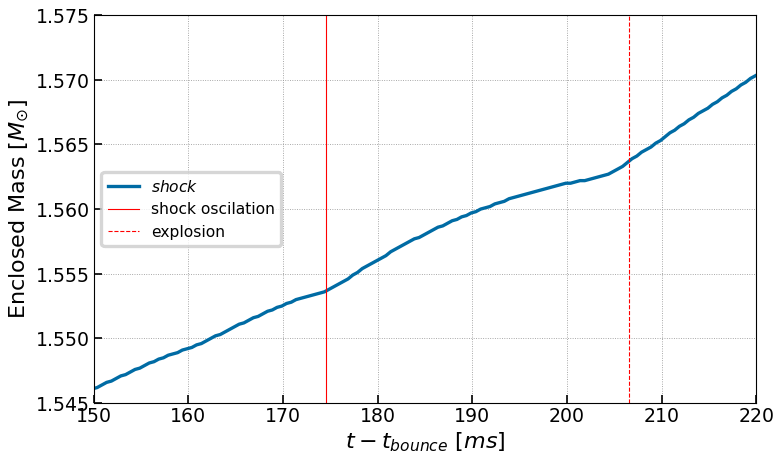

In [833]:
fig = plt.figure(figsize=(10,6), dpi=80)
ax  = fig.add_subplot(111)

print(bounce_time)
# ax.plot((time-bounce_time)*1e3, m5e10, color=colors[2],label=r'$\rho=5e10$')
# ax.plot((time-bounce_time)*1e3, m1e11, color=colors[1],label=r'$\rho=1e11$')
# ax.plot((time-bounce_time)*1e3, pns_mass, color=colors[0], label=r'$\rho=1e12$')
ax.plot((time-bounce_time)*1e3, shock_mass, color=colors[0], label=r'$shock$')
ax.axvline(174.5, color='r',linewidth=1,label='shock oscilation')
ax.axvline(206.5, color='r',linewidth=1,linestyle='--',label='explosion')


ax.legend(loc=6)
ax.set_xlim(150,220)
# ax.set_ylim(1.43,1.465)
# ax.set_ylim(1.43,1.55)
ax.set_ylim(1.545,1.575)
ax.set_ylabel(r'Enclosed Mass [$M_{\odot}$]', )
ax.set_xlabel(r'$t-t_{bounce}$ [$ms$]',)

fig.tight_layout()

print(base_path)
# plt.savefig(f'{base_path}grid.png')

(792,)


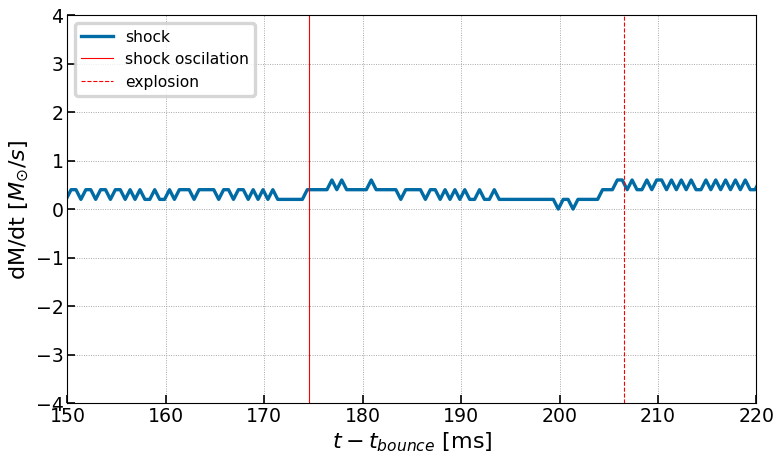

In [878]:
fig = plt.figure(figsize=(10,6), dpi=80)
ax  = fig.add_subplot(111)

dmdt = np.zeros(len(pns_mass))

for i in range(0,len(pns_mass)-1):
    # dmdt[i] = (m5e10[i]-m5e10[i-1])/5e-4
    dmdt[i] = (shock_mass[i+1]-shock_mass[i])/5e-4

print(np.shape(dmdt))

# ax.plot(((time-bounce_time)*1e3)[1:], dmdt[1:], color=colors[0], label=r'$\rho=5e10$')
ax.plot(((time-bounce_time)*1e3)[1:], dmdt[1:], color=colors[0], label=r'shock')

ax.axvline(174.5, color='r',linewidth=1,label='shock oscilation')
ax.axvline(206.5, color='r',linewidth=1,linestyle='--',label='explosion')

ax.legend(loc=0)
ax.set_xlim(150,220)
ax.set_ylim(0,0.7)
ax.set_ylim(-4,4)

ax.set_ylabel('dM/dt [$M_{\odot}/s$]')
ax.set_xlabel(r'$t-t_{bounce}$ [ms]')
fig.tight_layout()
# print(shock_mass)

(792,)


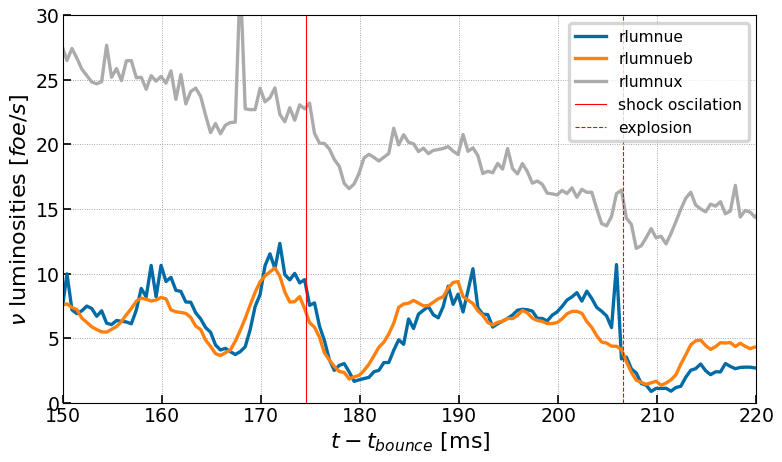

In [827]:
fig = plt.figure(figsize=(10,6), dpi=80)
ax  = fig.add_subplot(111)

print(np.shape(dmdt))

ax.plot(((time-bounce_time)*1e3), arlumnue,  label=r'rlumnue')
ax.plot(((time-bounce_time)*1e3), arlumnueb, label=r'rlumnueb')
ax.plot(((time-bounce_time)*1e3), arlumnux,  label=r'rlumnux')

ax.axvline(174.5, color='r',linewidth=1,label='shock oscilation')
ax.axvline(206.5, color='r',linewidth=1,linestyle='--',label='explosion')

ax.legend(loc=0)
ax.set_xlim(150,220)
ax.set_ylim(0,30)

ax.set_ylabel(r'$\nu$ luminosities [$foe/s$]')
ax.set_xlabel(r'$t-t_{bounce}$ [ms]')
fig.tight_layout()

101.00000000000036 105 42 194
201.0000000000006 210 45 246
298.0000000000006 312 45 287
101.00000000000036 105 42 194
201.0000000000006 210 45 246
298.0000000000006 312 45 287
[21.02377 21.07783 21.13098 21.18317 21.23436 21.28454 21.3337  21.38181
 21.42886 21.47485 21.51976 21.56358 21.60634 21.64802 21.68857 21.72797
 21.76618 21.80317 21.8389  21.87335]


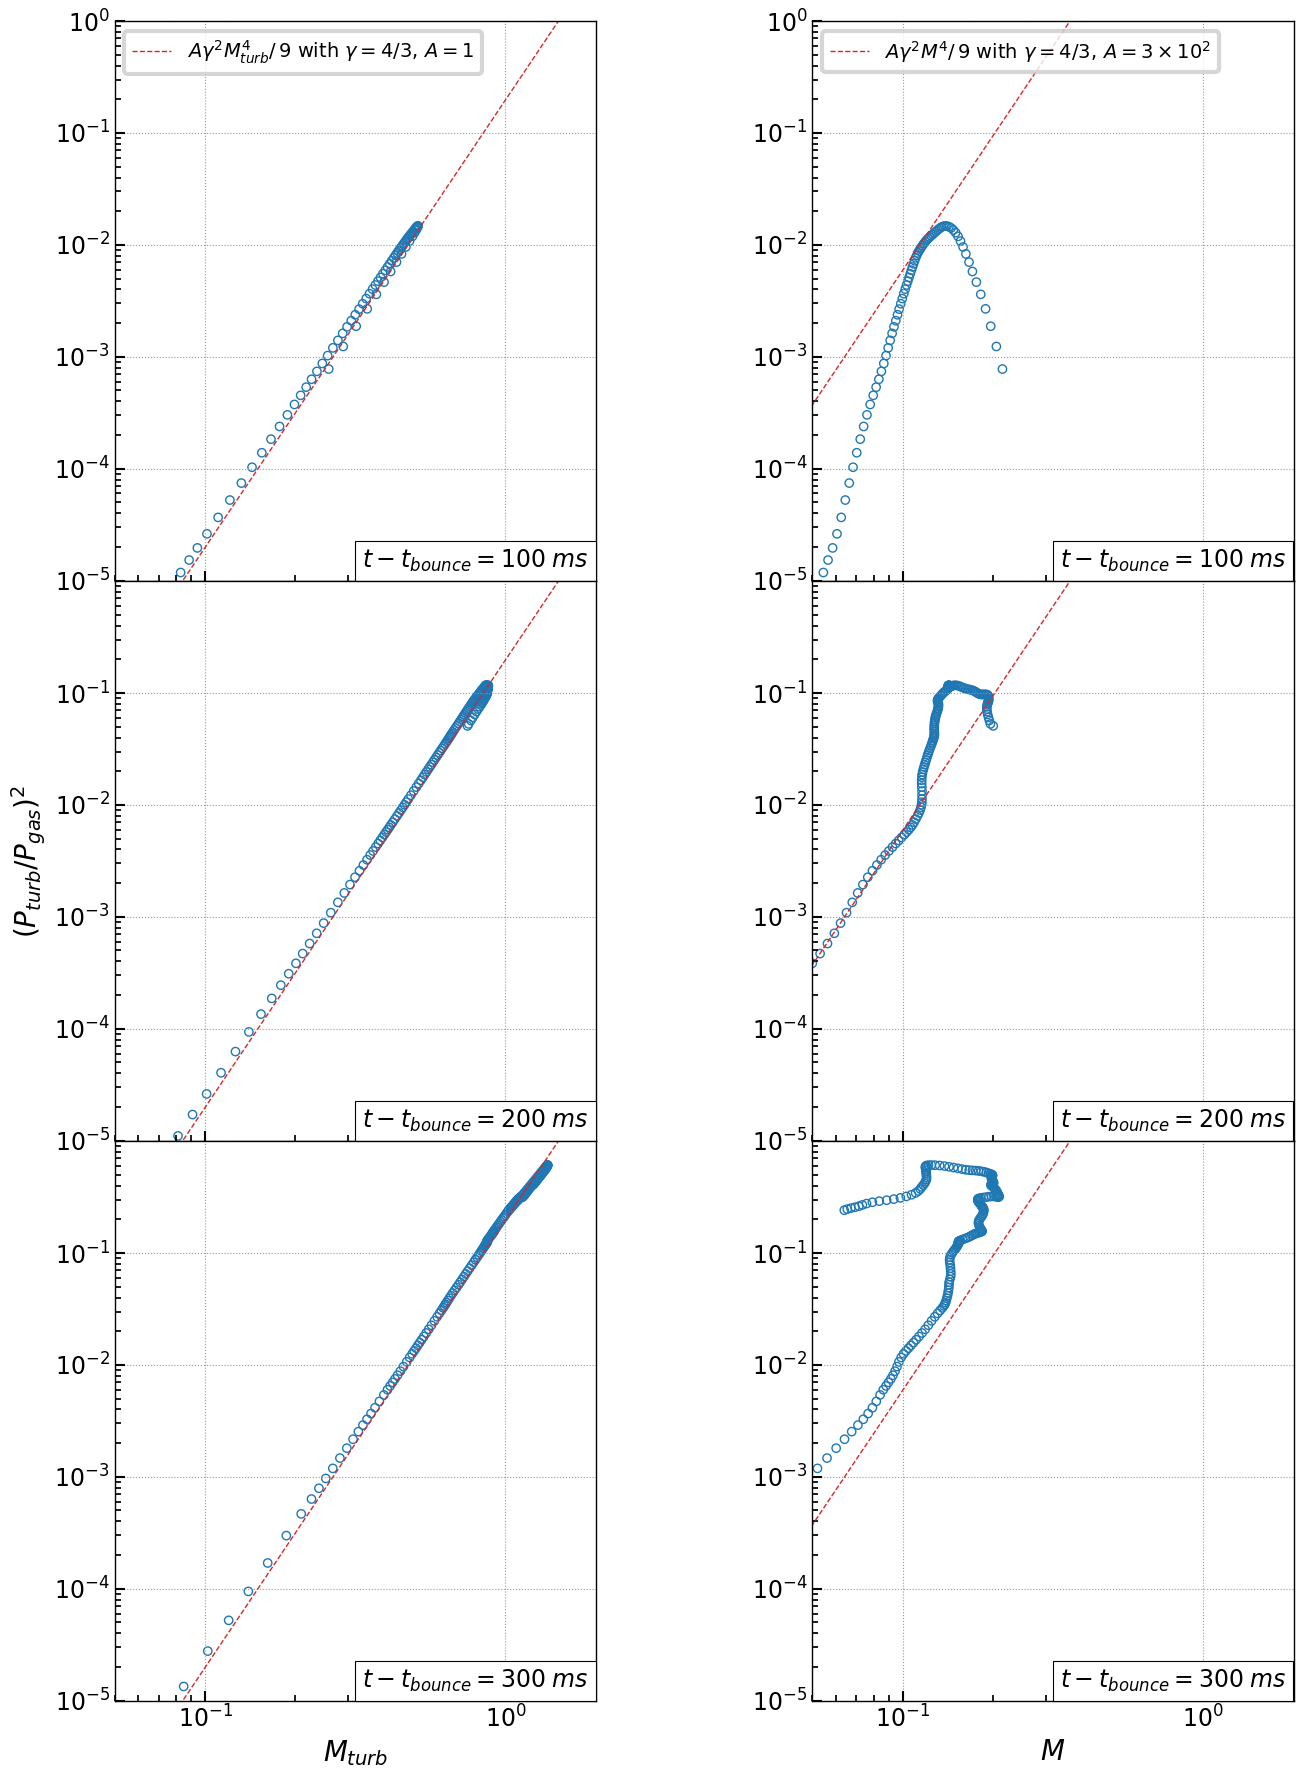

In [804]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython import display
import numpy as np
import os
import sys

import h5py as h5
import numpy as np

sys.path.append("/home/pkarpov/Sapsan")
from sapsan.utils import line_plot

def plot_params():
    params = {'font.size': 14, 'legend.fontsize': 14, 
              'axes.labelsize': 20, 'axes.titlesize':24,
              'xtick.labelsize': 17,'ytick.labelsize': 17,
              'axes.linewidth': 1, 'patch.linewidth': 3, 'lines.linewidth': 3,
              'xtick.major.width': 1.5,'ytick.major.width': 1.5,
              'xtick.minor.width': 1.25,'ytick.minor.width': 1.25,
              'xtick.major.size': 7,'ytick.major.size': 7,
              'xtick.minor.size': 4,'ytick.minor.size': 4,
              'xtick.direction': 'in','ytick.direction': 'in',              
              'axes.formatter.limits' : [-7, 7], 
              'axes.grid':True, 'grid.linestyle': ':', 'grid.color':'#999999',
              'text.usetex': False}              
    return params

class shock:
    def __init__(self, x, y, vsound):
        self.x = x
        self.y = y
        self.vsound = vsound
        self.shock_i = 0
        self.shock_r = 0
        
    def plot_shock(self, label=0, title='', shock=False, log=None, refresh=False, **kwargs):
        style = 'tableau-colorblind10'
        mpl.style.use(style)
        mpl.rcParams.update(plot_params())   

        plt.figure(figsize=(10,6))
        plt.gca().cla() 
        if log=='loglog': plt.loglog(self.x, self.y, label=label)
        elif log=='semilog': plt.semilogx(self.x, self.y, label=label)
        else: plt.plot(self.x, self.y, label=label)
            
        self.shock_position()
        plt.axvline(self.shock_r, color='tab:red', label='shock')
        
        plt.legend(loc=3)
        
        if 'xmin' in kwargs: xmin = kwargs['xmin']
        if 'xmax' in kwargs: xmax = kwargs['xmax']; plt.xlim(xmin, xmax)
        if 'ymin' in kwargs: ymin = kwargs['ymin']
        if 'ymax' in kwargs: ymax = kwargs['ymax']; plt.ylim(ymin, ymax)
        
        plt.xlabel('r')
        plt.ylabel('Velocity')
        plt.title(title)
        if refresh:
            display.clear_output(wait=True)
            display.display(plt.gcf()) 
        return plt
    
    def shock_position(self):    
        self.shock_r = 0
        self.shock_i=np.argmin(self.y)
        self.shock_r = self.x[self.shock_i]
        
        return self.shock_i
        
def pns_radius(rho, rho_threshold=5e10):    
    for i in range(len(rho)-1,-1,-1):
        if rho[i] >= rho_threshold:
            pns_x = rho[i]
            pns_ind = i
            break
    return pns_ind
  
ind = 200
base_path = '/home/pkarpov/scratch/adam'
dataset = 's17.0.swbj15.horo.3d_combined'

# versus = 'r' # 'r' or 'mach'
# mach_type = 'v' # 'v' or 'vturb'
versus = 'mach'
mach_type = 'vturb'

if versus == 'r':
    path = f'{base_path}/{dataset}/grid.h5'
    with (h5.File(path, 'r')) as hf:
        print(hf.keys())
        r = np.array(hf['Z'])    

# step = [105,158,210]
step = [105,210,312]
# step = [210,250,270]

fig, axs = plt.subplots(3, 2, sharex=True, figsize=(15,18))
fig.subplots_adjust(hspace=0, wspace=3)

for k in range(2):
    for j,ind in enumerate(step):  
        ax = axs[j,k]  
        path = f'{base_path}/{dataset}/dump_{ind:05d}.h5'

        with (h5.File(path, 'r')) as hf:
            # print(hf.keys())
            v = np.array(hf['u1'])
            vsound = np.array(hf['eos1'])
            rho = np.array(hf['rho'])
            
        pns_ind = pns_radius(rho, rho_threshold=1e13)
        sh = shock(np.arange(len(v)), v, vsound)
        
        match j:
            case 0: shock_shift=8
            case 1: shock_shift=28
            case 2: shock_shift=47
            
        shock_ind = sh.shock_position()-shock_shift

        val_names = ['u1', 'eos1', 'eos0', 'Pturb', 'rho']
        all_vals = np.zeros((len(val_names), len(v)))

        with (h5.File(path, 'r')) as hf:
            for i in range(len(val_names)):
                all_vals[i] = np.array(hf[val_names[i]])
            time1d = np.array(hf['Time'])[0]*1e3
            
        print(time1d, ind, pns_ind, shock_ind)

        v      = all_vals[0]
        vsound = all_vals[1]
        p      = all_vals[2]
        pturb  = all_vals[3]
        rho    = all_vals[4]
    
        vturb = np.sqrt(3*pturb/rho)
        Mt    = abs(vturb/vsound)
        M     = abs(v/vsound)            
        
        if versus == 'mach':
            
            yrel = (pturb/p)**2
            if k==0: xrel = Mt
            elif k==1: xrel = M
            
            ax.scatter(xrel[pns_ind:shock_ind],yrel[pns_ind:shock_ind], 
                    marker='o',linewidth=1,facecolors='none', edgecolors='tab:blue')
            
            # ax.plot(xrel[pns_ind:shock_ind],yrel[pns_ind:shock_ind],linewidth=1)
            
            xlim = [3e-2, 2e0]  
            gamma = 4/3
            slope = (gamma**2)/9
            linx = np.linspace(xlim[0], xlim[1], 100)
            liny = slope*linx**4
            if k==0: 
                A = 1
                label = r'$A\gamma^2M_{turb}^4/\,9$ with $\gamma=4/3,\,A=1$'                
            else: 
                A = 3e2
                label = r'$A\gamma^2M^4/\,9$ with $\gamma=4/3,\,A=3\times10^2$'
            ax.loglog(linx,liny*A, color='tab:red', linewidth=1, linestyle = '--', label=label)
            ax.set_ylim(1e-5, 1e0)
            ax.set_xlim(5e-2,2)
            #ax.set_ylim(0, 0.7)    
            if j==0: ax.legend(loc=2)
            elif j==1 and k==0: ax.set_ylabel('$(P_{turb}/P_{gas})^2$')
            elif j==2: 
                if k==0: ax.set_xlabel('$M_{turb}$')#=v_{turb}/v_{sound}$')
                else: ax.set_xlabel('$M$')
            if j>0: axs[j,k].yaxis.set_ticks([1e-5,1e-4,1e-3,1e-2,1e-1])
            save_name = f'{versus}_{ind}.png'
            
            match j:
                case 0: time_shift=-1
                case 1: time_shift=-1
                case 2: time_shift=+2
            ax.text(1.89,1.3e-5, '$t-t_{bounce}=%.f \;ms$'%(time1d+time_shift), 
                    horizontalalignment='right', fontsize=17,
                    bbox=dict(boxstyle='square', facecolor='white',linewidth=0.8)) 
            
        elif versus == 'r':
                
            if mach_type == 'v': 
                yrel = M
                ylabel = '$M=v/v_{sound}$'
                save_name = f'M_{versus}_{ind}.png'
            elif mach_type == 'vturb': 
                yrel = Mt
                ylabel = '$M_t=v_{turb}/v_{sound}$' 
                save_name = f'Mt_{versus}_{ind}.png'           
            xrel = r[1:]
            print('mach', max(yrel))

            #ax.scatter(xrel,yrel, marker='o',linewidth=1,facecolors='none', edgecolors='tab:blue')
            ax = line_plot([[xrel,yrel],
                            [xrel[pns_ind:shock_ind],yrel[pns_ind:shock_ind]]], 
                        linestyle=['-','--'], label=['Full', 'Convection'],figsize=(10,6))        
            #ax.set_ylim(1e-5, 1e0)
            ax.set_xlim(0, 275)
            ax.set_xlim(0, 375)
            ax.set_ylim(0, 1.1)    
            ax.set_xlabel('$Radius \; [km]$')
            ax.set_ylabel(ylabel)
            ax.get_legend().remove()
            
        else: sys.exit('Unknown versus parameter')
        
#ax.set_xlabel('$(V/V_{sound})^2$')
# ax.set_title(f'Checkpoint = {ind}, t={time1d:.1f}')
# ax.get_legend().remove()     
fig.tight_layout(h_pad=-0.8)


# ax = line_plot([[vsound,(p/rho)**(1/2)]], 
#             plot_type='plot')

print(r[shock_ind-30:shock_ind-10])
# save_path = f'{base_path}/{dataset}/plots/mach_lim_slope0.7'
save_path = f'{base_path}'
plt.savefig(f'{save_path}/s17_mach_fit.png')
# plt.close()

/home/pkarpov/scratch/adam/s19.0.swbj15.horo.3d/dump_00100.h5
95.00000000000065
Power Spectrum has been calculated. k and E(k) have been returned.


SystemExit: 

/home/pkarpov/anaconda3/envs/py310/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3386: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


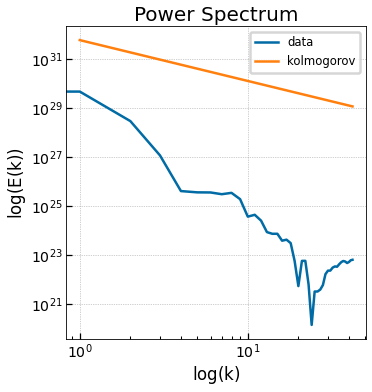

In [879]:
import os
import sys

sys.path.append("../../../")

from sapsan.lib.backends import MLflowBackend
from sapsan.lib.data import HDF5Dataset, EquidistantSampling, flatten
#from sapsan.lib.estimator.cnn.cnn3d_estimator import CNN3d, CNN3dConfig
from sapsan.lib import Train, Evaluate

import h5py as h5
import numpy as np
from sapsan.utils import PowerSpectrum



# Pturb/Pgas percentage plots

import os
import sys
import h5py as h5

sys.path.append("/home/pkarpov/Sapsan")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sapsan.utils import line_plot, plot_params
from scipy.signal import savgol_filter as savgol

def shock_radius(v, x, bump=0, old_shock_ind=-1):                        

    shock_ind = bump+np.argmin(v[bump:])
    shock_x   = x[shock_ind]

    return shock_ind, shock_x
    
def pns_radius(rho, x, rho_threshold = 1e11):      
        
    for i in range(len(rho)):            
        if rho[i] > rho_threshold:
            pns_ind = i
            pns_x   = x[i]
            
    return pns_ind, pns_x   

def h5open_checkpoint(base_file, base_path, dataset, i, fullout=True, s2=False):
    file   = base_file%i
    file1d = f'{base_path}{dataset}/{file}' 
    file_grid = f'{base_path}{dataset}/grid.h5'
           
    print(file1d)
    with h5.File(file_grid, 'r') as hf:
        r = np.array(hf['Z'])[1:]
    with h5.File(file1d, 'r') as hf:                
        time1d = np.array(hf['Time'])[0]*1e3
        Pgas   = np.array(hf['eos0'])        
        rho    = np.array(hf['rho'])
        v      = np.array(hf['u1'])        
        if s2: Pturb  = np.array(hf['Pturb_s2'])      
        else: Pturb  = np.array(hf['Pturb'])              

    pns_ind, pns_x     = pns_radius(rho, r)
    shock_ind, shock_x = shock_radius(v, r)
            
    return r,Pgas,Pturb,time1d,pns_ind,pns_x,shock_ind,shock_x

style = 'tableau-colorblind10'
mpl.style.use(style)
mpl.rcParams.update(plot_params()) 

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']                       

base_path = '/home/pkarpov/scratch/adam/'
masses    = [12.0,13.0,17.0,19.0]#,13.0,16.0,17.0,18.0,19.0]
masses    = [19.0]
# dataset   = '_g8k_c7k_p0.6k'
dataset   = '.swbj15.horo.3d'
savepath  = 'shock_evolution_adam.png'

bounce = {12:0,13:0,17:0,19:0}
# step   = [200,300,310]
# step   = [211,261,311]
# step = [105,158,210]
# step = [105,210,312]
step = [210,312]
step=[100]

datasets = [f's{m}{dataset}' for m in masses]

# fig = plt.figure(figsize=(6,6), dpi=80)
# ax  = fig.add_subplot(111)

# fig, axs = plt.subplots(3, 1, sharex=True, figsize=(7,18))
# fig.subplots_adjust(hspace=0)

xmin=1.5e9
xmax=-1
for j in range(3):
    for i, dataset in enumerate(datasets):         
        r,Pgas,Pturb,time1d,pns_ind,pns_x,shock_ind,shock_x = h5open_checkpoint('dump_%05d.h5', base_path, dataset, bounce[round(masses[i])]+step[j])

        print(time1d)
        match masses[i]:
            case 12: icolor=0
            case 13: icolor=1
            case 17: icolor=3
            case 19: icolor=5
            
        match j:
            case 0: 
                match masses[i]:
                    case 12: shock_shift=8
                    case 13: shock_shift=8
                    case 17: shock_shift=8
                    case 19: shock_shift=8
            case 1:
                match masses[i]:
                    case 12: shock_shift=27
                    case 13: shock_shift=18
                    case 17: shock_shift=28
                    case 19: shock_shift=21
            case 2: 
                match masses[i]:
                    case 12: shock_shift=80
                    case 13: shock_shift=27
                    case 17: shock_shift=47
                    case 19: shock_shift=47
                            
        # axs[j].semilogy(r[:shock_ind-shock_shift],(Pturb/Pgas)[:shock_ind-shock_shift], lw=2, label=round(masses[i]), color=colors[icolor])
        vturb = np.sqrt(Pturb)
        vel = np.array([vturb[pns_ind:shock_ind-shock_shift+1]])
        ps = PowerSpectrum(vel)

        k_bins, Ek_bins = ps.calculate()
        splt = ps.spectrum_plot(k_bins,Ek_bins)        
        sys.exit()
        
        if pns_x < xmin: xmin = pns_x
        if shock_x > xmax: xmax = r[shock_ind-shock_shift]
    
        axs[j].text(405,0.0111, '$t-t_{bounce}=%.f \;ms$'%(time1d), 
                horizontalalignment='right', fontsize=17,
                bbox=dict(boxstyle='square', facecolor='white',linewidth=0.8)) 

        if j>0: axs[j].yaxis.set_ticks([1e-2,1e-1])

        # axs[j].set_xlim([xmin,xmax])
        # axs[j].set_xlim([xmin,410])
        # axs[j].set_ylim([1e-2,1e0])
        plt.xlabel('Radius [km]')
        if j==1: axs[j].set_ylabel(r'$P_{turb}/P_{gas}$')
        axs[0].legend(loc=2, ncols=1)

fig.tight_layout(h_pad=-0.75)